jumlah investasi di berbagai kecamatan, clusterisasi bisa digunakan untuk mengelompokkan kecamatan berdasarkan pola investasi yang mirip. Hal ini dapat membantu dalam memahami karakteristik ekonomi atau perkembangan di berbagai kecamatan. Misalnya, kamu ingin tahu kecamatan mana yang memiliki jumlah investasi serupa, baik dalam kategori rendah, sedang, maupun tinggi.


Klasterisasi : Daerah Investasi Tertinggi, Menengah, Terbawah

Prediksi jumlah investasi berdasarkan komponen kayak bangunan dll

Prediksi Tren Investasi berdasarkan ko

## Note Tujuan ML

Prediksi Jumlah Investasi yang Dibutuhkan
Tujuan: Memprediksi besaran investasi yang dibutuhkan untuk proyek baru berdasarkan karakteristik proyek lainnya yang mirip.

Fitur (Parameter): (Menyesuaikan Matrix Correlation)

Uraian_Jenis_Proyek (Jenis Proyek)

Uraian Skala Usaha (Skala Usaha)

Kab Kota Usaha (Lokasi Usaha)

luas_tanah (Luas Tanah)

Mesin Peralatan, Pembelian Pematangan Tanah, Bangunan Gedung, Modal Kerja
TKI (Jumlah Tenaga Kerja Indonesia)

Kegunaan: Dengan memprediksi jumlah investasi yang diperlukan, DPMPSTP dapat lebih baik mempersiapkan fasilitas atau insentif yang mungkin diperlukan oleh investor dan membantu dalam perencanaan pengembangan wilayah.

In [1]:
import pandas as pd
data = pd.read_excel('DP.Proyek.xlsx')


In [2]:
data.describe()


,No.,Nib,longitude,latitude,Kbli,Mesin Peralatan,Mesin Peralatan Impor,Pembelian Pematangan Tanah,Bangunan Gedung,Modal Kerja,Lain Lain,Jumlah Investasi,TKI
count,47362.000000,4.736200e+04,31000.000000,31000.000000,47360.000000,4.732400e+04,4.732400e+04,4.732400e+04,4.732400e+04,4.732400e+04,4.732400e+04,4.736200e+04,47362.000000
mean,34.217383,2.050094e+12,115.086611,-8.637295,55217.773374,1.825140e+08,4.353022e+07,2.387920e+08,4.957435e+08,9.064734e+08,2.316032e+09,4.226076e+09,4.211098
std,81.267977,2.025611e+12,3.613250,0.738508,21287.264415,8.543663e+09,2.711180e+09,1.348424e+10,2.586724e+10,2.634735e+10,1.054288e+10,6.087282e+10,17.001537
min,1.000000,1.012300e+11,-122.654136,-56.408583,1111.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,12.828250,9.032300e+11,115.163154,-8.727835,47112.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+07,1.000000
50%,24.656500,1.603230e+12,115.173005,-8.645177,55193.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+05,0.000000e+00,1.000000e+08,2.000000
75%,36.484750,2.410220e+12,115.197064,-8.567168,68200.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+08,4.010000e+09,1.000005e+10,4.000000
max,999.000000,9.120801e+12,326.058900,49.145434,97000.000000,1.825094e+12,5.000000e+11,2.000000e+12,4.265164e+12,5.000000e+12,2.000000e+12,8.297595e+12,1093.000000


In [3]:
print(data.dtypes)

No.                              float64
Id Proyek                         object
Uraian_Jenis_Proyek               object
Nib                                int64
Nama Perusahaan                   object
Tanggal Terbit Oss                object
Uraian Status Penanaman Modal     object
Uraian Jenis Perusahaan           object
Uraian Risiko Proyek              object
nama_proyek                       object
Uraian Skala Usaha                object
Alamat Usaha                      object
Kab Kota Usaha                    object
kecamatan_usaha                   object
kelurahan_usaha                   object
longitude                        float64
latitude                         float64
Kbli                             float64
Judul Kbli                        object
KL/Sektor Pembina                 object
Nama User                         object
Nomor Identitas User              object
Email                             object
Nomor Telp                        object
luas_tanah      

In [4]:
data.shape

(47362, 34)

In [5]:
data.isnull().sum()

No.                                  0
Id Proyek                            0
Uraian_Jenis_Proyek                  0
Nib                                  0
Nama Perusahaan                      0
Tanggal Terbit Oss                   0
Uraian Status Penanaman Modal        0
Uraian Jenis Perusahaan              0
Uraian Risiko Proyek                 0
nama_proyek                         82
Uraian Skala Usaha                  15
Alamat Usaha                        47
Kab Kota Usaha                       0
kecamatan_usaha                      0
kelurahan_usaha                    788
longitude                        16362
latitude                         16362
Kbli                                 2
Judul Kbli                           2
KL/Sektor Pembina                   89
Nama User                           23
Nomor Identitas User                 0
Email                              119
Nomor Telp                         261
luas_tanah                           0
satuan_tanah             

In [6]:
for kolom in data.columns:
  print('Kolom', kolom, data[kolom].unique())
  print('------------------------------------------------------------')

Kolom No. [ 1.     2.     3.    ... 47.36  47.361 47.362]
------------------------------------------------------------
Kolom Id Proyek ['R-201912162117221565981' 'R-201912162117371483293'
 'R-201912162118448127342' ... 'R-202312311539312204714'
 'R-202312311541053029132' 'R-202312311757150042401']
------------------------------------------------------------
Kolom Uraian_Jenis_Proyek ['Utama' 'Pendukung' 'Pendukung UMKU' 'Kantor Cab Administrasi'
 'Perluasan']
------------------------------------------------------------
Kolom Nib [8120006881204 8120000840189 8120001831438 ... 3012230206354 9120003553308
 3012230219209]
------------------------------------------------------------
Kolom Nama Perusahaan ['UD.BALIDITA' 'MATRA BALI COLIVING & COWORKING'
 'CIPTA INDAH (PAVING STONE)' ... 'OVER LAND OASIS BALI' 'KIRGANADI'
 'HENNY CONSTANTIN EKA NOVITA']
------------------------------------------------------------
Kolom Tanggal Terbit Oss ['10/08/2018' '08/08/2018' '13/08/2018' ... '23/02/2019

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47362 entries, 0 to 47361
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   No.                            47362 non-null  float64
 1   Id Proyek                      47362 non-null  object 
 2   Uraian_Jenis_Proyek            47362 non-null  object 
 3   Nib                            47362 non-null  int64  
 4   Nama Perusahaan                47362 non-null  object 
 5   Tanggal Terbit Oss             47362 non-null  object 
 6   Uraian Status Penanaman Modal  47362 non-null  object 
 7   Uraian Jenis Perusahaan        47362 non-null  object 
 8   Uraian Risiko Proyek           47362 non-null  object 
 9   nama_proyek                    47280 non-null  object 
 10  Uraian Skala Usaha             47347 non-null  object 
 11  Alamat Usaha                   47315 non-null  object 
 12  Kab Kota Usaha                 47362 non-null 

In [8]:
data.head()

,No.,Id Proyek,Uraian_Jenis_Proyek,Nib,Nama Perusahaan,Tanggal Terbit Oss,Uraian Status Penanaman Modal,Uraian Jenis Perusahaan,Uraian Risiko Proyek,nama_proyek,...,luas_tanah,satuan_tanah,Mesin Peralatan,Mesin Peralatan Impor,Pembelian Pematangan Tanah,Bangunan Gedung,Modal Kerja,Lain Lain,Jumlah Investasi,TKI
0,1.0,R-201912162117221565981,Utama,8120006881204,UD.BALIDITA,10/08/2018,PMDN,Perorangan,Rendah,Ud. Balidita,...,100,m2,0.0,0.0,0.0,450000000.0,0.0,0.0,55000000,2
1,2.0,R-201912162117371483293,Utama,8120000840189,MATRA BALI COLIVING & COWORKING,08/08/2018,PMDN,Perorangan,Menengah Rendah,Matra Bali Coliving & Coworking,...,500,m2,0.0,0.0,0.0,600000000.0,50000000.0,150000000.0,800000000,6
2,3.0,R-201912162118448127342,Utama,8120001831438,CIPTA INDAH (PAVING STONE),13/08/2018,PMDN,Perorangan,Rendah,CIPTA INDAH,...,5.550,m2,0.0,0.0,0.0,0.0,0.0,200000000.0,50000000,10
3,4.0,R-201912162119170314013,Utama,8120002811549,CV MITRA ABADI CORPORATION,14/08/2018,PMDN,Perorangan,Rendah,Pengadaan Alat Telekomunikasi,...,150,m2,NaN,NaN,NaN,NaN,NaN,NaN,300000000,2
4,5.0,R-201912162119170488491,Utama,8120002811549,CV MITRA ABADI CORPORATION,14/08/2018,PMDN,Perorangan,Rendah,Pengadaan Komputer,...,150,m2,NaN,NaN,NaN,NaN,NaN,NaN,300000000,2


Nib = NIB (Nomor Induk Berusaha) adalah identitas Pelaku Usaha yang diterbitkan oleh Lembaga OSS setelah Pelaku Usaha melakukan Pendaftaran. Setiap pelaku usaha wajib mempunya NIB.

Klib = Klasifikasi Baku Lapangan Usaha Indonesia

KBLI adalah pengklasifikasian aktivitas/kegiatan ekonomi Indonesia yang menghasilkan produk/output, baik berupa barang maupun jasa, berdasarkan lapangan usaha untuk memberikan keseragaman konsep, definisi, dan klasifikasi lapangan usaha dalam perkembangan dan pergeseran kegiatan ekonomi di Indonesia.

PMA = Penanaman Modal Asing 

PMDN = Penanam Modal Dalam Negeri

PT dikatakan berstatus PMA apabila secara keseluruhan atau sebagian sahamnya dimiliki oleh asing. Perubahan stastus PT dari PMA menjadi PMDN dilakukan apabila secara keseluruhan saham dalam perseroan telah dimiliki oleh pemegang saham Indonesia.

In [9]:
# Memilih hanya kolom yang relevan
columns_to_keep = [
    'Uraian_Jenis_Proyek', 'Tanggal Terbit Oss', 'Uraian Status Penanaman Modal', 
    'Uraian Jenis Perusahaan', 'Uraian Risiko Proyek', 'Uraian Skala Usaha', 
    'Kab Kota Usaha', 'kecamatan_usaha', 'kelurahan_usaha', 'Judul Kbli', 
    'KL/Sektor Pembina', 'luas_tanah', 'Mesin Peralatan', 'Mesin Peralatan Impor', 
    'Pembelian Pematangan Tanah', 'Bangunan Gedung', 'Modal Kerja', 
    'Lain Lain', 'Jumlah Investasi', 'TKI'
]

data = data[columns_to_keep]

# Hapus baris yang memiliki nilai kosong
data.dropna(inplace=True)

# Menampilkan data teratas setelah pembersihan
print(data.head())

   Uraian_Jenis_Proyek Tanggal Terbit Oss Uraian Status Penanaman Modal  \
1                Utama         08/08/2018                          PMDN   
2                Utama         13/08/2018                          PMDN   
10               Utama         20/08/2018                          PMDN   
11               Utama         23/08/2018                          PMDN   
12               Utama         28/08/2018                          PMDN   

   Uraian Jenis Perusahaan Uraian Risiko Proyek Uraian Skala Usaha  \
1               Perorangan      Menengah Rendah        Usaha Mikro   
2               Perorangan               Rendah        Usaha Mikro   
10              Perorangan      Menengah Rendah        Usaha Mikro   
11              Perorangan               Rendah        Usaha Mikro   
12              Perorangan               Rendah        Usaha Mikro   

   Kab Kota Usaha kecamatan_usaha  kelurahan_usaha  \
1     Kab. Badung      Kuta Utara       Tibubeneng   
2     Kab. Badung   

Kolom yang tidak dipakai :
•	No
•	Id proyek
•	Nib
•	Nama Perusahaan
•	nama_proyek
•	Alamat usaha
•	longitude
•	latitude
•	Kbli (kode)
•	Nama user
•	nomor identitas
•	email
•	no telp
•	satuan_tanah


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46430 entries, 1 to 47361
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Uraian_Jenis_Proyek            46430 non-null  object 
 1   Tanggal Terbit Oss             46430 non-null  object 
 2   Uraian Status Penanaman Modal  46430 non-null  object 
 3   Uraian Jenis Perusahaan        46430 non-null  object 
 4   Uraian Risiko Proyek           46430 non-null  object 
 5   Uraian Skala Usaha             46430 non-null  object 
 6   Kab Kota Usaha                 46430 non-null  object 
 7   kecamatan_usaha                46430 non-null  object 
 8   kelurahan_usaha                46430 non-null  object 
 9   Judul Kbli                     46430 non-null  object 
 10  KL/Sektor Pembina              46430 non-null  object 
 11  luas_tanah                     46430 non-null  object 
 12  Mesin Peralatan                46430 non-null 

In [11]:
data.isnull().sum()

Uraian_Jenis_Proyek              0
Tanggal Terbit Oss               0
Uraian Status Penanaman Modal    0
Uraian Jenis Perusahaan          0
Uraian Risiko Proyek             0
Uraian Skala Usaha               0
Kab Kota Usaha                   0
kecamatan_usaha                  0
kelurahan_usaha                  0
Judul Kbli                       0
KL/Sektor Pembina                0
luas_tanah                       0
Mesin Peralatan                  0
Mesin Peralatan Impor            0
Pembelian Pematangan Tanah       0
Bangunan Gedung                  0
Modal Kerja                      0
Lain Lain                        0
Jumlah Investasi                 0
TKI                              0
dtype: int64

In [12]:
# Memastikan kolom 'Tanggal Terbit Oss' dikonversi ke tipe datetime
data['Tanggal Terbit Oss'] = pd.to_datetime(data['Tanggal Terbit Oss'], errors='coerce')

# Mengekstrak tahun dari 'Tanggal Terbit Oss' dan menyimpannya di kolom baru 'Tahun Terbit'
data['Tahun Terbit'] = data['Tanggal Terbit Oss'].dt.year

# Menampilkan beberapa baris data untuk memastikan konversi
print(data[['Tanggal Terbit Oss', 'Tahun Terbit']].head())

   Tanggal Terbit Oss  Tahun Terbit
1          2018-08-08          2018
2          2018-08-13          2018
10         2018-08-20          2018
11         2018-08-23          2018
12         2018-08-28          2018


C:\Users\Widnyana\AppData\Local\Temp\ipykernel_12856\2532453412.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Tanggal Terbit Oss'] = pd.to_datetime(data['Tanggal Terbit Oss'], errors='coerce')


C:\Users\Widnyana\AppData\Local\Temp\ipykernel_12856\1425507242.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


                            Mesin Peralatan  Mesin Peralatan Impor  \
Mesin Peralatan                    1.000000               0.008376   
Mesin Peralatan Impor              0.008376               1.000000   
Pembelian Pematangan Tanah         0.448621               0.090572   
Bangunan Gedung                    0.771169               0.346331   
Modal Kerja                        0.046029               0.086070   
Lain Lain                          0.291208              -0.000629   
Jumlah Investasi                   0.637890               0.249988   
TKI                                0.188218               0.099207   
Tahun Terbit                      -0.030075              -0.018061   

                            Pembelian Pematangan Tanah  Bangunan Gedung  \
Mesin Peralatan                               0.448621         0.771169   
Mesin Peralatan Impor                         0.090572         0.346331   
Pembelian Pematangan Tanah                    1.000000         0.655566   

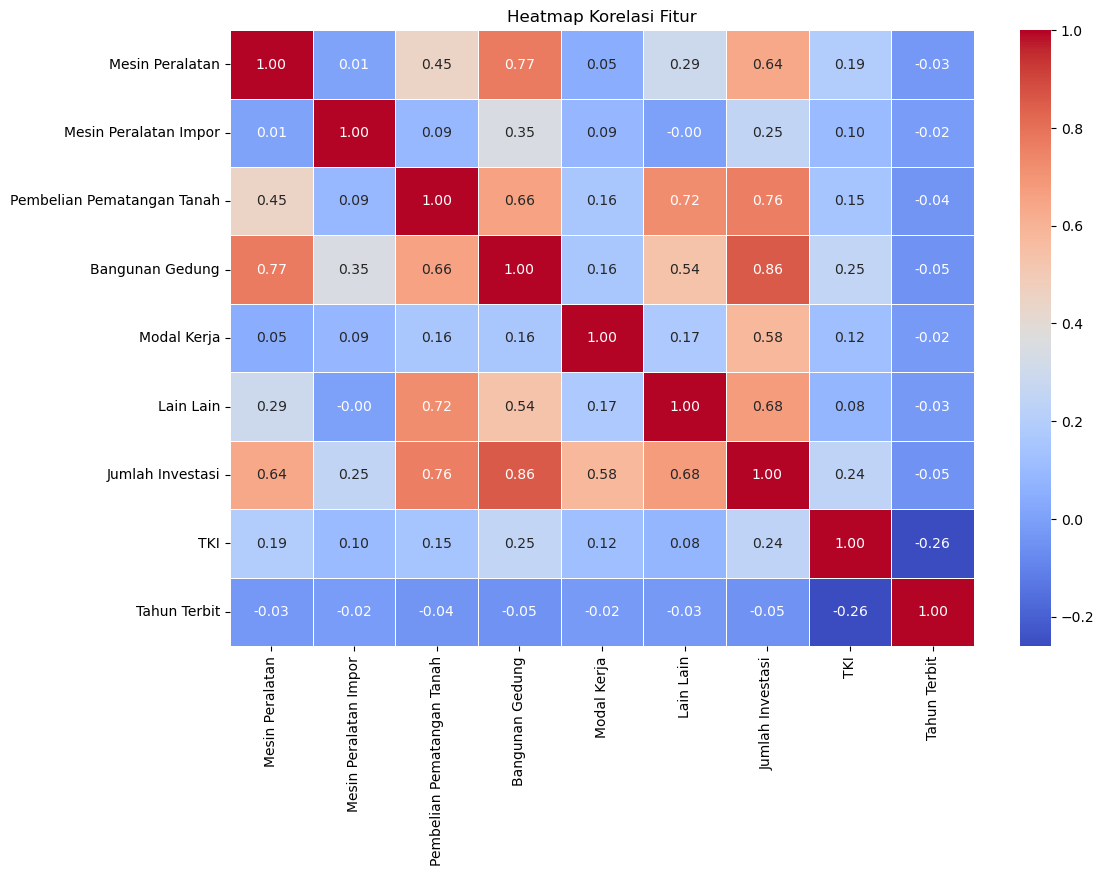

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung matriks korelasi
correlation_matrix = data.corr()

# Menampilkan matriks korelasi
print(correlation_matrix)
# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Fitur')
plt.show()

In [14]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Menentukan kolom kategorikal dan numerik
categorical_cols = [
    'Uraian_Jenis_Proyek', 'Uraian Status Penanaman Modal',
    'Uraian Jenis Perusahaan', 'Uraian Risiko Proyek', 'Uraian Skala Usaha',
    'Kab Kota Usaha', 'kecamatan_usaha', 'kelurahan_usaha', 'Judul Kbli',
    'KL/Sektor Pembina'
]

numerical_cols = [
    'luas_tanah', 'Mesin Peralatan', 'Mesin Peralatan Impor',
    'Pembelian Pematangan Tanah', 'Bangunan Gedung', 'Modal Kerja',
    'Lain Lain', 'TKI', 'Tahun Terbit', 'Bulan Terbit'
]

# Mengonversi 'luas_tanah' menjadi numerik (jika masih berupa string)
data['luas_tanah'] = pd.to_numeric(data['luas_tanah'], errors='coerce')

# Menghapus baris dengan nilai kosong setelah konversi
data.dropna(subset=['luas_tanah'], inplace=True)

# One-Hot Encoding untuk variabel kategorikal dengan kategori sedikit
onehot_cols = [
    'Uraian_Jenis_Proyek', 'Uraian Status Penanaman Modal',
    'Uraian Jenis Perusahaan', 'Uraian Risiko Proyek', 'Uraian Skala Usaha'
]

data = pd.get_dummies(data, columns=onehot_cols, drop_first=True)

# Label Encoding untuk variabel dengan banyak kategori
label_cols = ['Kab Kota Usaha', 'kecamatan_usaha', 'kelurahan_usaha', 'Judul Kbli', 'KL/Sektor Pembina']

label_encoder = LabelEncoder()
for col in label_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Memastikan tidak ada nilai kosong setelah encoding
data.dropna(inplace=True)

# Menampilkan beberapa baris data setelah encoding
print(data.head())


   Tanggal Terbit Oss  Kab Kota Usaha  kecamatan_usaha  kelurahan_usaha  \
1          2018-08-08               0                3               57   
2          2018-08-13               0                2               20   
10         2018-08-20               0                2               38   
11         2018-08-23               0                3               26   
12         2018-08-28               0                2               20   

    Judul Kbli  KL/Sektor Pembina  luas_tanah  Mesin Peralatan  \
1          633                 13      500.00              0.0   
2          208                 18        5.55              0.0   
10         975                 13      191.00       70000000.0   
11         946                 13      766.00       29060458.0   
12         908                 16       10.00        1000000.0   

    Mesin Peralatan Impor  Pembelian Pematangan Tanah  ...  \
1                     0.0                0.000000e+00  ...   
2                     0.0   

                                                    Kab Kota Usaha  \
Kab Kota Usaha                                                 NaN   
kecamatan_usaha                                                NaN   
kelurahan_usaha                                                NaN   
Judul Kbli                                                     NaN   
KL/Sektor Pembina                                              NaN   
luas_tanah                                                     NaN   
Mesin Peralatan                                                NaN   
Mesin Peralatan Impor                                          NaN   
Pembelian Pematangan Tanah                                     NaN   
Bangunan Gedung                                                NaN   
Modal Kerja                                                    NaN   
Lain Lain                                                      NaN   
Jumlah Investasi                                               NaN   
TKI                 

C:\Users\Widnyana\AppData\Local\Temp\ipykernel_12856\3798531749.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


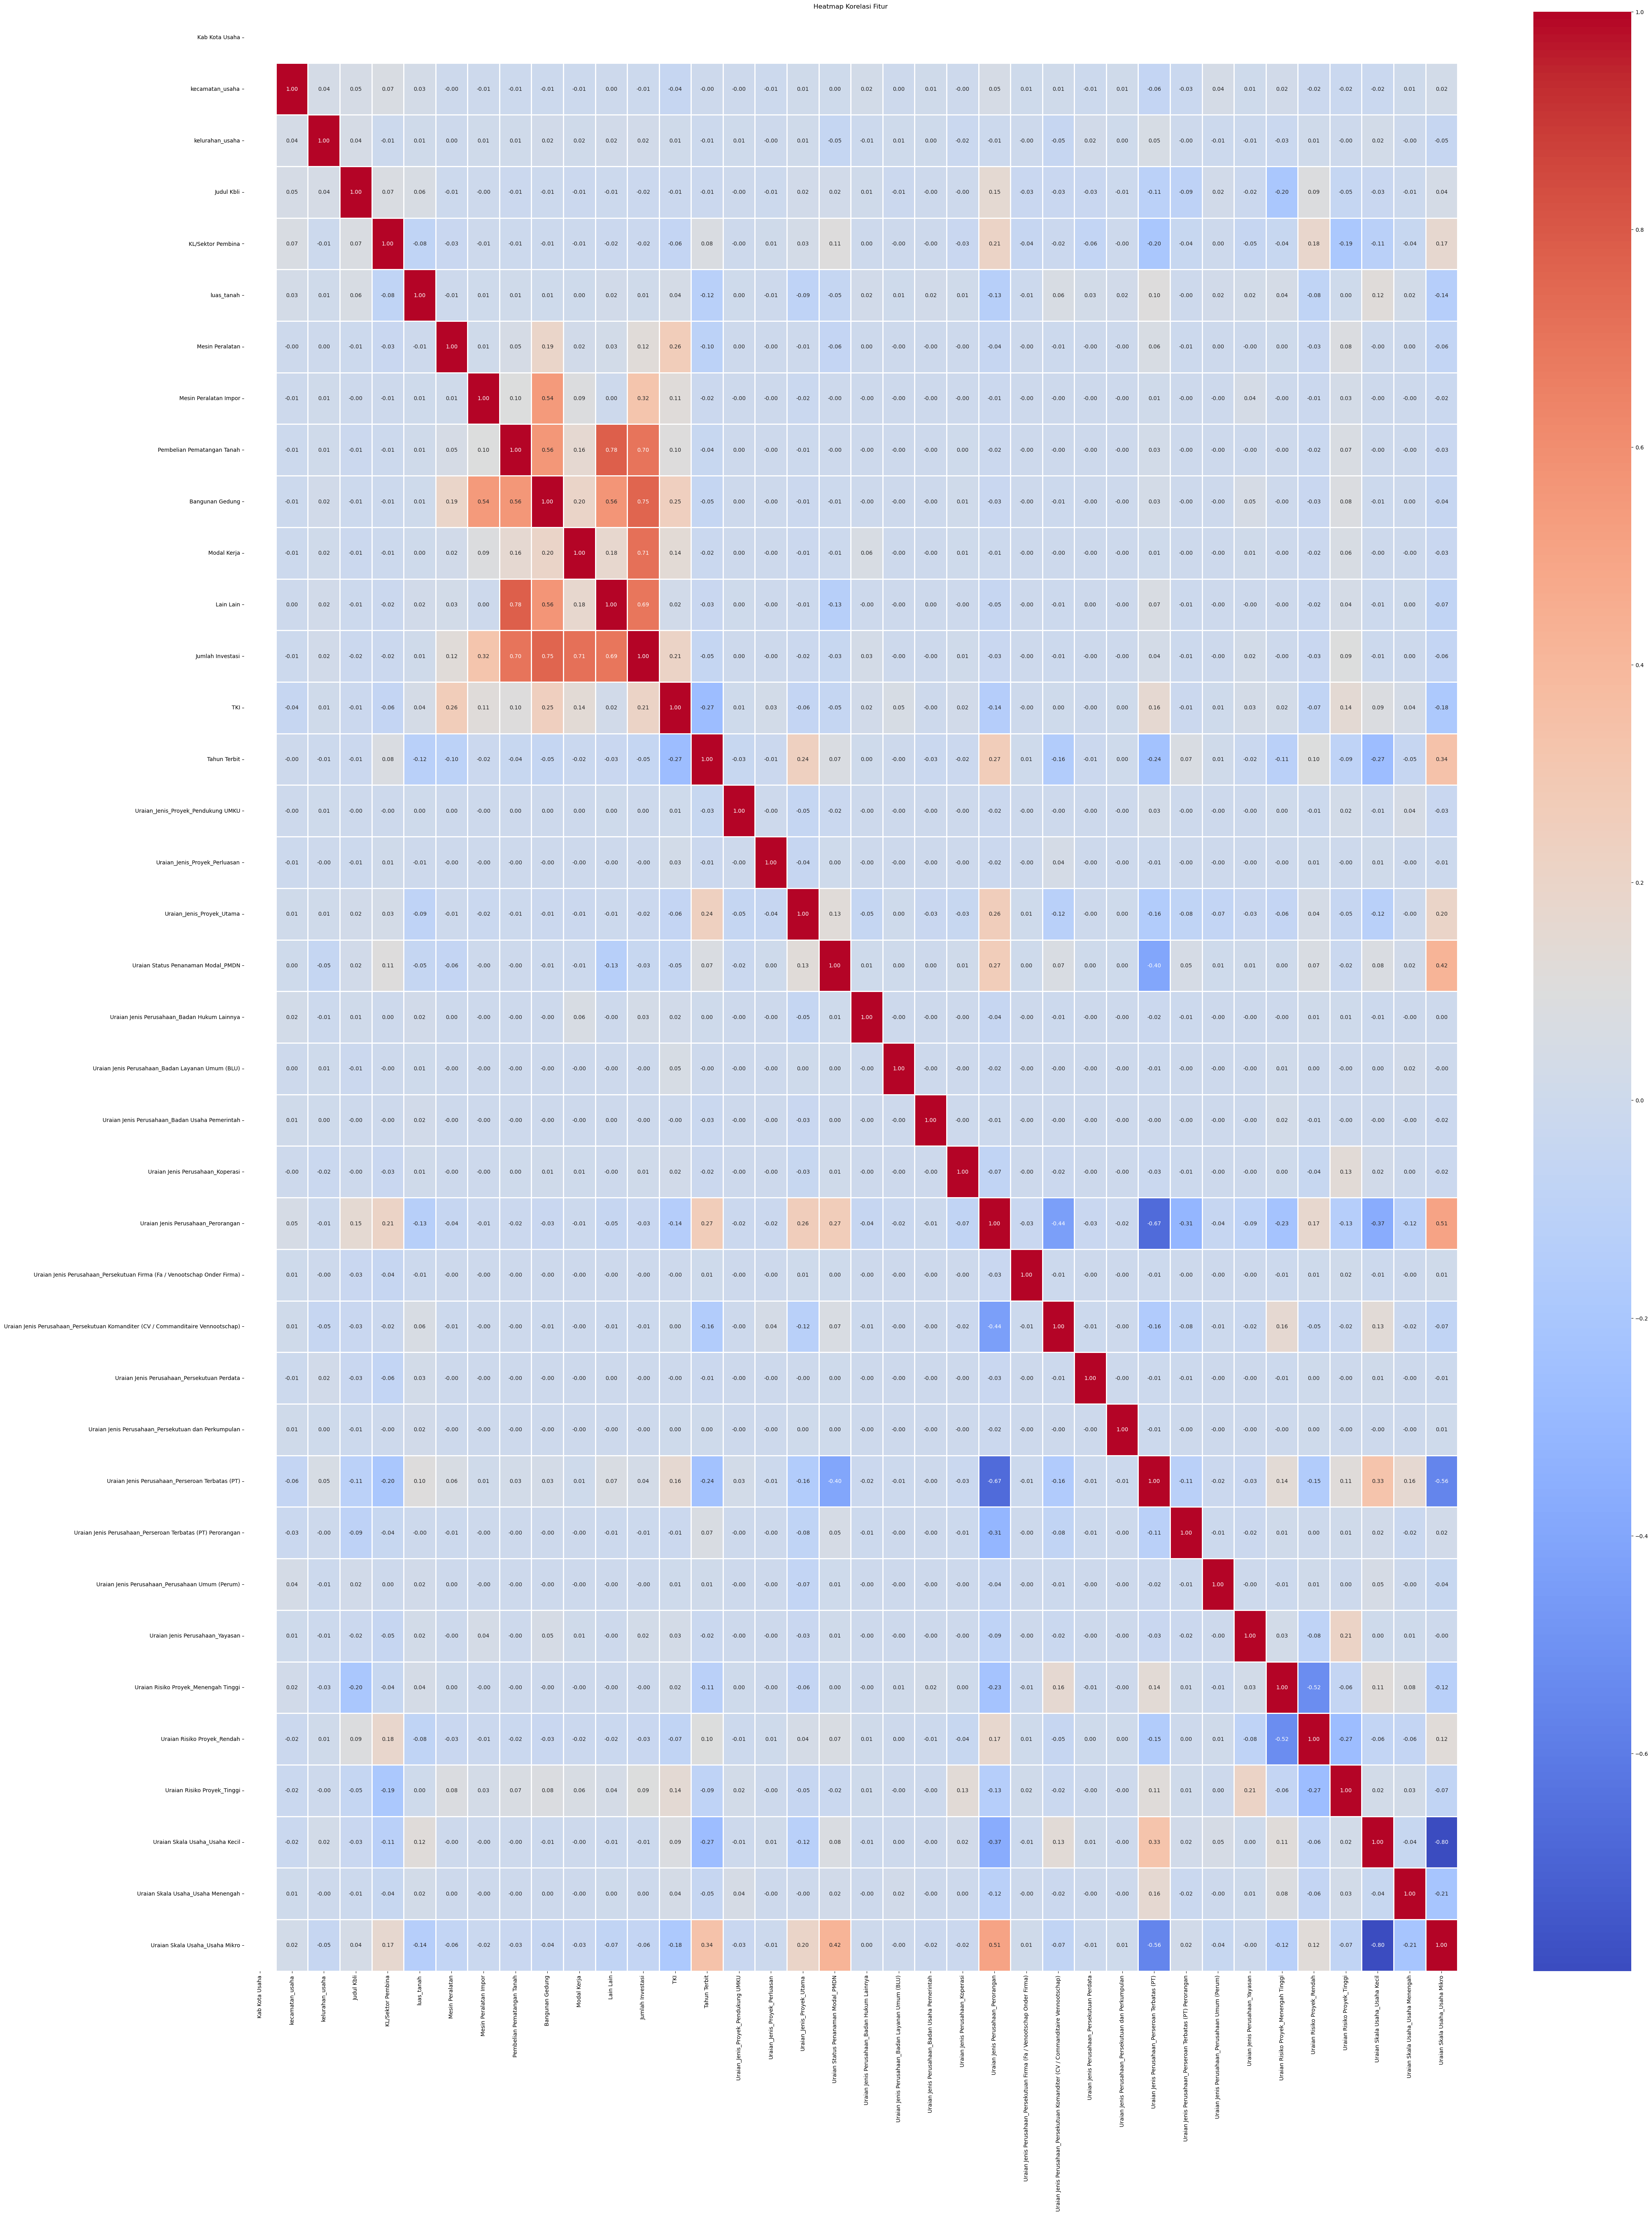

In [15]:
# Menghitung matriks korelasi
corr_matrix = data.corr()

# Menampilkan matriks korelasi
print(corr_matrix)

# Optional: Visualisasi menggunakan heatmap
plt.figure(figsize=(50, 65))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.9)
plt.title('Heatmap Korelasi Fitur')
plt.show()

In [16]:
# Menghitung korelasi antara semua fitur
corr_matrix = data.corr()

# Menampilkan korelasi antara setiap fitur dengan 'jumlah_investasi'
target_corr = corr_matrix['Jumlah Investasi'].sort_values(ascending=False)

# Menentukan threshold untuk memilih fitur dengan korelasi tinggi
threshold = 0.1

# Memilih fitur dengan korelasi absolut tinggi terhadap 'jumlah_investasi'
high_corr_features = target_corr[abs(target_corr) > threshold]

# Menampilkan fitur-fitur dengan korelasi tinggi terhadap 'jumlah_investasi'
print("Fitur-fitur dengan korelasi tinggi terhadap 'jumlah_investasi':")
print(high_corr_features)

Fitur-fitur dengan korelasi tinggi terhadap 'jumlah_investasi':
Jumlah Investasi              1.000000
Bangunan Gedung               0.754301
Modal Kerja                   0.712522
Pembelian Pematangan Tanah    0.700498
Lain Lain                     0.692623
Mesin Peralatan Impor         0.322637
TKI                           0.206617
Mesin Peralatan               0.122999
Name: Jumlah Investasi, dtype: float64


C:\Users\Widnyana\AppData\Local\Temp\ipykernel_12856\1962061495.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


c:\Users\Widnyana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Widnyana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Widnyana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Widnyana\anac

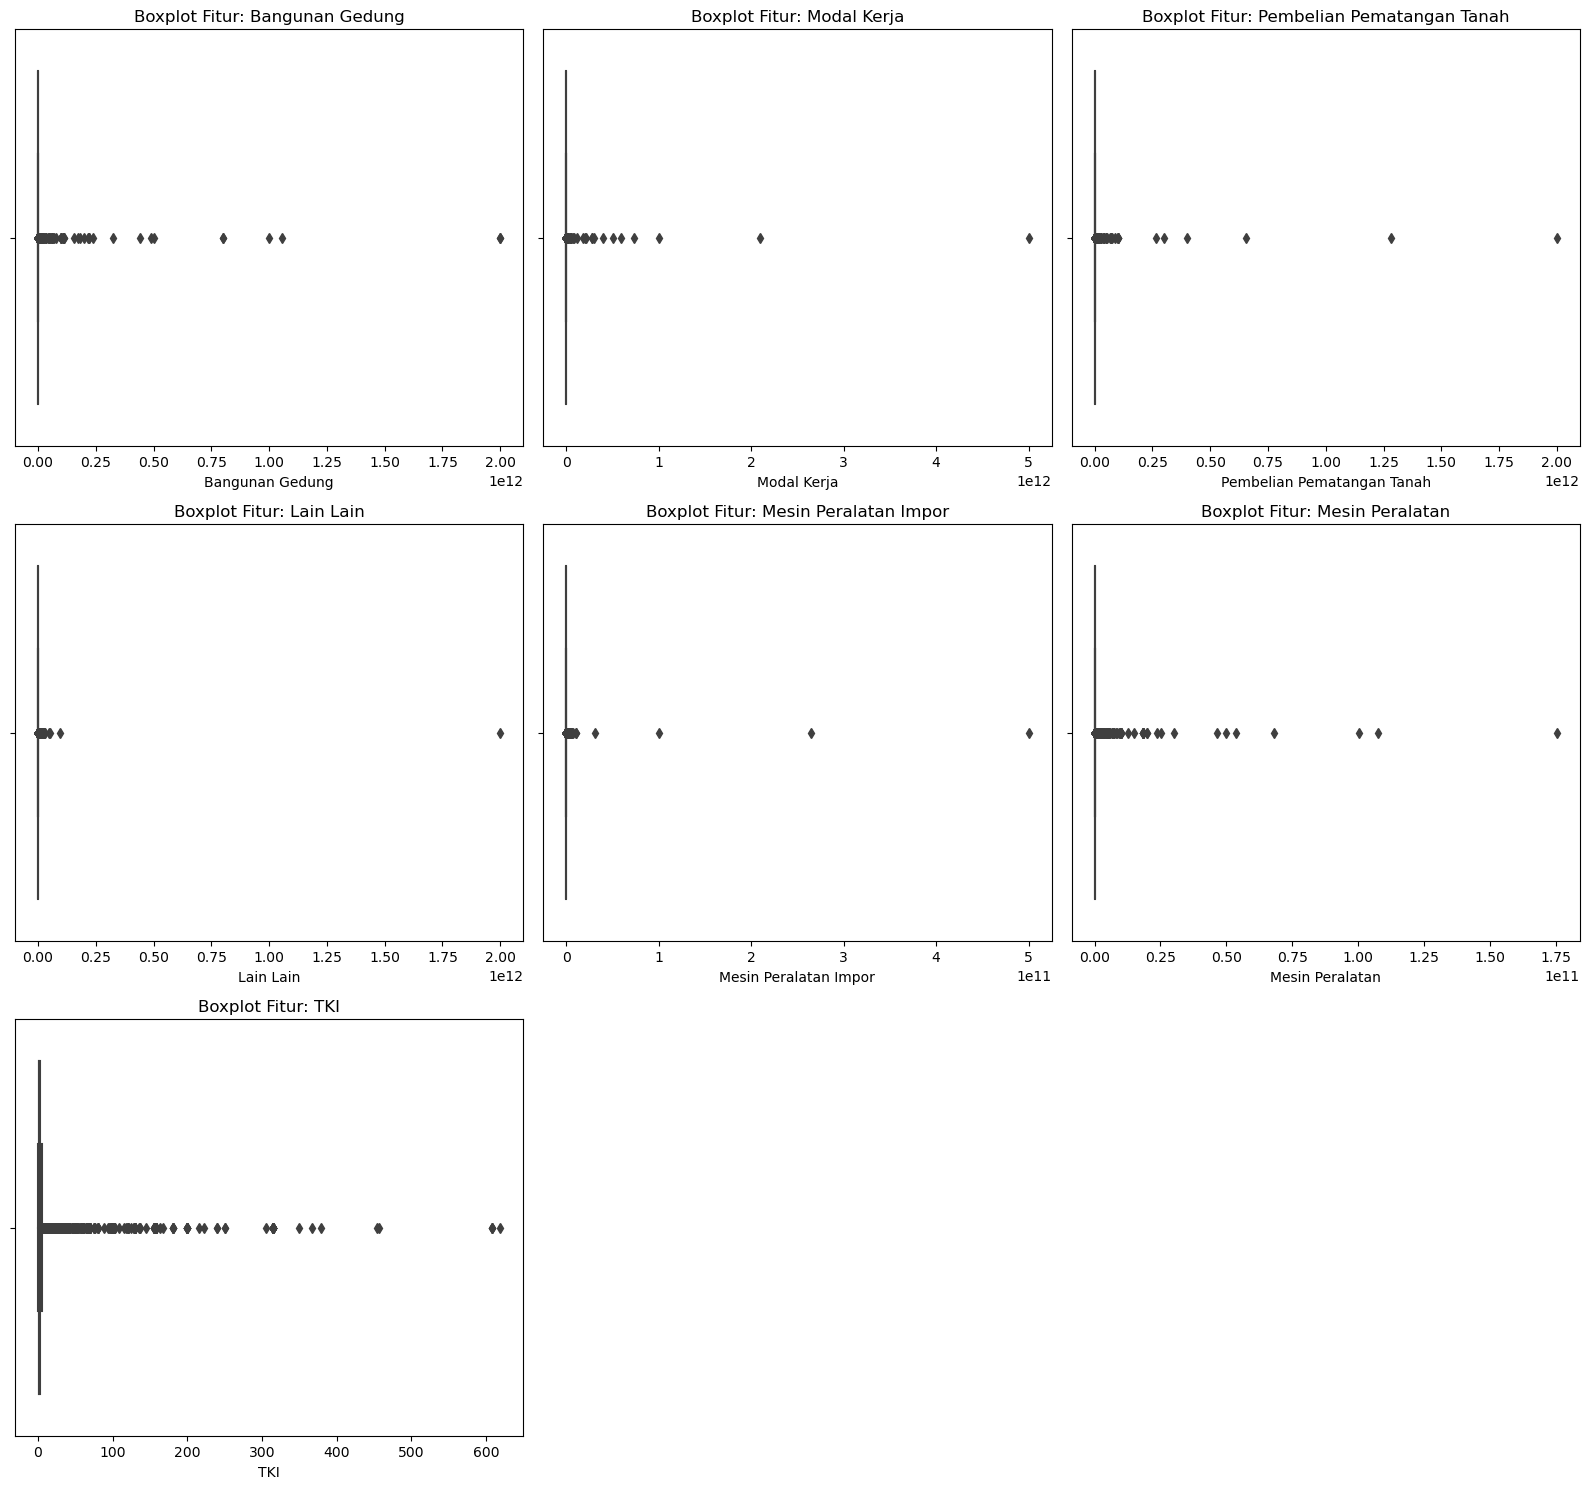

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# List fitur dengan korelasi tinggi terhadap 'jumlah_investasi'
high_corr_features_list = ['Bangunan Gedung', 'Modal Kerja', 'Pembelian Pematangan Tanah', 
                           'Lain Lain', 'Mesin Peralatan Impor', 'Mesin Peralatan', 'TKI']

# Membuat boxplot untuk setiap fitur yang memiliki korelasi tinggi terhadap 'jumlah_investasi'
plt.figure(figsize=(16, 15))  # Mengatur ukuran figure lebih besar
for i, col in enumerate(high_corr_features_list, 1):
    plt.subplot(3, 3, i)  # 3 baris, 3 kolom
    sns.boxplot(data[col])
    plt.title(f'Boxplot Fitur: {col}')
plt.tight_layout()
plt.show()


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Kolom fitur dan target
feature_columns = ['Mesin Peralatan', 'Mesin Peralatan Impor', 'Pembelian Pematangan Tanah', 'Bangunan Gedung', 'Modal Kerja',  'Lain Lain', 'TKI']
target_column = 'Jumlah Investasi'

# Pisahkan fitur dan target
X = data[feature_columns]
y = data[target_column]

# --- MODEL REGRESI LINEAR DENGAN SCALING --- 
print("Evaluasi Model Regresi Linear:\n")

# Bagi data menjadi training dan testing set
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan fit StandardScaler
scaler = StandardScaler()
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

# Inisialisasi model regresi linear
linear_model = LinearRegression()

# Train model regresi linear dengan data yang sudah diskalakan
linear_model.fit(X_train_reg_scaled, y_train_reg)

# Prediksi menggunakan model regresi linear
y_pred_reg = linear_model.predict(X_test_reg_scaled)

# Evaluasi model regresi linear
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")
print()


Evaluasi Model Regresi Linear:

Mean Squared Error (MSE): 5.8156798606678296e+16
R^2 Score: 0.9999568162758158



In [20]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE # --- MODEL RANDOM FOREST CLASSIFIER (Dengan Oversampling SMOTE) ---

print("Evaluasi Model Random Forest Classifier dengan SMOTE:\n")

# Membuat target biner (kategori rendah [0] dan tinggi [1]) berdasarkan nilai rata-rata investasi
y_binary = (y > y.mean()).astype(int)

# Bagi data menjadi training dan testing set untuk random forest
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Menggunakan SMOTE untuk oversampling pada data training
smote = SMOTE(random_state=42)
X_train_class_oversampled, y_train_class_oversampled = smote.fit_resample(X_train_class, y_train_class)

# Inisialisasi Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model random forest dengan data oversampled
random_forest_model.fit(X_train_class_oversampled, y_train_class_oversampled)

# Prediksi menggunakan model random forest
y_pred_class_rf = random_forest_model.predict(X_test_class)

# Evaluasi model random forest classifier
accuracy_rf = accuracy_score(y_test_class, y_pred_class_rf)
conf_matrix_rf = confusion_matrix(y_test_class, y_pred_class_rf)
class_report_rf = classification_report(y_test_class, y_pred_class_rf)

print(f"Accuracy: {accuracy_rf}")
print("Confusion Matrix:")
print(conf_matrix_rf)
print("\nClassification Report:")
print(class_report_rf)

Evaluasi Model Random Forest Classifier dengan SMOTE:

Accuracy: 0.9919550698239222
Confusion Matrix:
[[6217   21]
 [  32  318]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6238
           1       0.94      0.91      0.92       350

    accuracy                           0.99      6588
   macro avg       0.97      0.95      0.96      6588
weighted avg       0.99      0.99      0.99      6588



In [21]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Simpan model dan scaler menggunakan pickle
with open('linear_model.pkl', 'wb') as model_file:
    pickle.dump(linear_model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model dan scaler telah disimpan.")

# Fungsi untuk memuat model dan scaler dari file pickle
def load_model_and_scaler():
    with open('linear_model.pkl', 'rb') as model_file:
        loaded_model = pickle.load(model_file)
    with open('scaler.pkl', 'rb') as scaler_file:
        loaded_scaler = pickle.load(scaler_file)
    return loaded_model, loaded_scaler

# Fungsi untuk melakukan prediksi berdasarkan input pengguna
def predict_user_input(user_input):
    model, scaler = load_model_and_scaler()
    user_input_scaled = scaler.transform([user_input])
    prediction = model.predict(user_input_scaled)
    return prediction[0]

# Uji coba dengan inputan pengguna
print("\nUji coba dengan inputan pengguna:")
user_input = []
for feature in feature_columns:
    value = float(input(f"Masukkan nilai untuk {feature}: "))
    user_input.append(value)

prediction = predict_user_input(user_input)
print(f"Prediksi hasil investasi untuk inputan Anda adalah: {prediction}")

Model dan scaler telah disimpan.

Uji coba dengan inputan pengguna:


Prediksi hasil investasi untuk inputan Anda adalah: 1154113530257.7915


c:\Users\Widnyana\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
file_name = 'dataset_CLEAN.xlsx'
data.to_excel(file_name, index=False)

In [ ]:
# Simpan model dan scaler menggunakan pickle
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(random_forest_model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model dan scaler telah disimpan.")

# Fungsi untuk memuat model dan scaler dari file pickle
def load_model_and_scaler():
    with open('random_forest_model.pkl', 'rb') as model_file:
        loaded_model = pickle.load(model_file)
    with open('scaler.pkl', 'rb') as scaler_file:
        loaded_scaler = pickle.load(scaler_file)
    return loaded_model, loaded_scaler

# Fungsi untuk melakukan prediksi berdasarkan input pengguna
def predict_user_input(user_input):
    model, scaler = load_model_and_scaler()
    user_input_scaled = scaler.transform([user_input])
    prediction = model.predict(user_input_scaled)
    return prediction[0]

# Uji coba dengan inputan pengguna
print("\nUji coba dengan inputan pengguna:")
user_input = []
for feature in feature_columns:
    value = float(input(f"Masukkan nilai untuk {feature}: "))
    user_input.append(value)

prediction = predict_user_input(user_input)
print(f"Prediksi kategori investasi untuk inputan Anda adalah: {prediction}")

Model dan scaler telah disimpan.

Uji coba dengan inputan pengguna:


Prediksi kategori investasi untuk inputan Anda adalah: 1


c:\Users\Widnyana\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Widnyana\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


c:\Users\Widnyana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


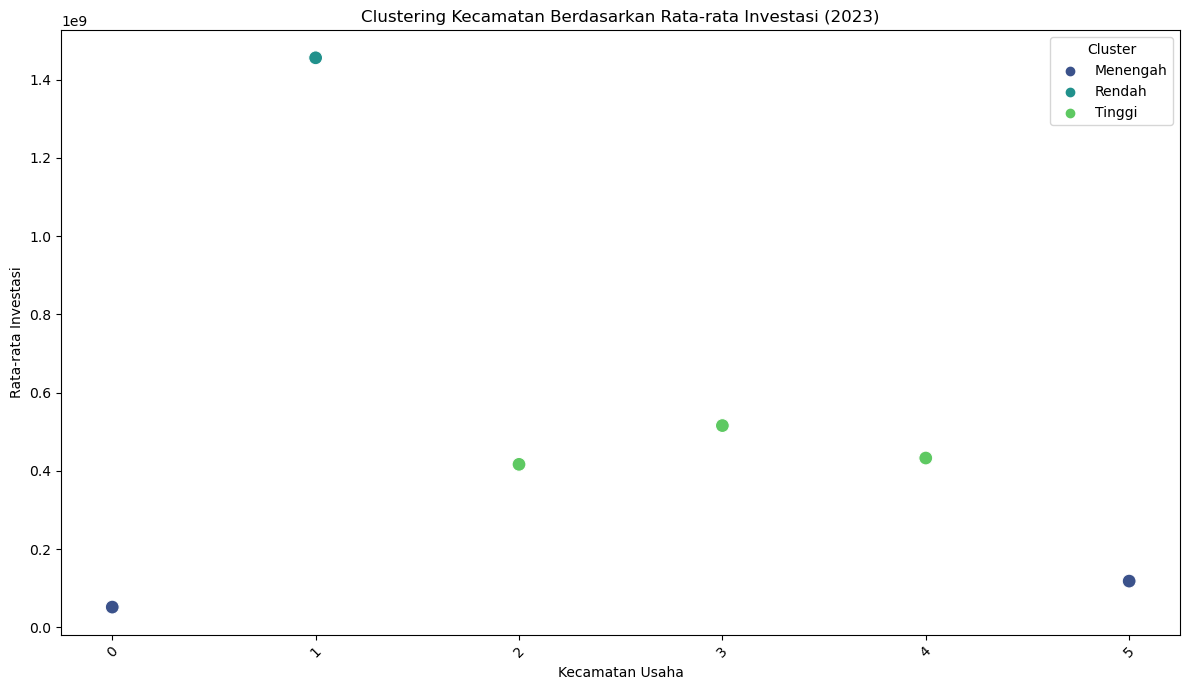

   kecamatan_usaha  rata_rata_investasi  cluster cluster_label
0                0         5.180523e+07        2      Menengah
1                1         1.456039e+09        1        Rendah
2                2         4.167479e+08        0        Tinggi
3                3         5.158365e+08        0        Tinggi
4                4         4.328716e+08        0        Tinggi
5                5         1.182576e+08        2      Menengah


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Konversi kolom 'Tanggal Terbit Oss' ke tipe datetime
# data['Tanggal Terbit Oss'] = pd.to_datetime(data['Tanggal Terbit Oss'], format='%d/%m/%Y', errors='coerce')

# # Ekstrak tahun dari kolom 'Tanggal Terbit Oss' dan menyimpannya di kolom baru 'Tahun Terbit'
# data['Tahun Terbit'] = data['Tanggal Terbit Oss'].dt.year

# # Tanyakan kepada pengguna tahun yang ingin dianalisis
# tahun_input = int(input("Masukkan tahun yang ingin dianalisis: "))

# # Filter data berdasarkan tahun yang dipilih
# data_filtered = data[data['Tahun Terbit'] == tahun_input]

# # Hitung rata-rata investasi per kecamatan untuk tahun yang dipilih
# data_avg = data_filtered.groupby('kecamatan_usaha').agg({'Jumlah Investasi': 'mean'}).reset_index()
# data_avg.rename(columns={'Jumlah Investasi': 'rata_rata_investasi'}, inplace=True)

# # Standarisasi fitur sebelum clustering
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data_avg[['rata_rata_investasi']])

# # Model K-Means Clustering
# kmeans = KMeans(n_clusters=3, random_state=42)  # Mengelompokkan ke dalam 3 cluster
# data_avg['cluster'] = kmeans.fit_predict(data_scaled)

# # Membuat pemetaan klaster ke label deskriptif
# cluster_labels = {
#     0: 'Tinggi',
#     1: 'Rendah',
#     2: 'Menengah'
# }

# # Mengganti angka klaster dengan label deskriptif
# data_avg['cluster_label'] = data_avg['cluster'].map(cluster_labels)

# # Visualisasi hasil clustering
# plt.figure(figsize=(12, 7))
# sns.scatterplot(data=data_avg, x='kecamatan_usaha', y='rata_rata_investasi', hue='cluster_label', palette='viridis', s=100)
# plt.title(f'Clustering Kecamatan Berdasarkan Rata-rata Investasi ({tahun_input})')
# plt.xlabel('Kecamatan Usaha')
# plt.ylabel('Rata-rata Investasi')
# plt.legend(title='Cluster')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# # Cetak hasil clustering
# print(data_avg[['kecamatan_usaha', 'rata_rata_investasi', 'cluster', 'cluster_label']])


In [ ]:
import pandas as pd

# Misalkan data adalah DataFrame yang telah dimuat sebelumnya

# Menampilkan beberapa baris data untuk memastikan struktur DataFrame
print(data[['kecamatan_usaha']].head())

# Ambil daftar unik kode kecamatan dari dataset
unique_kecamatan = data['kecamatan_usaha'].unique()

# Tampilkan hasil
print("Daftar Unik Kode Kecamatan dan Jumlah Data per Kode:")
for kode in unique_kecamatan:
    # Menampilkan jumlah data untuk setiap kode kecamatan
    count = (data['kecamatan_usaha'] == kode).sum()
    print(f"Kode Kecamatan: {kode}, Jumlah Data: {count}")


    kecamatan_usaha
1                 3
2                 2
10                2
11                3
12                2
Daftar Unik Kode Kecamatan dan Jumlah Data per Kode:
Kode Kecamatan: 3, Jumlah Data: 8496
Kode Kecamatan: 2, Jumlah Data: 6603
Kode Kecamatan: 1, Jumlah Data: 6356
Kode Kecamatan: 4, Jumlah Data: 6320
Kode Kecamatan: 0, Jumlah Data: 3817
Kode Kecamatan: 5, Jumlah Data: 1348


Bangunan Gedung:
  Interquartile Range (IQR): 0.0 - 0.0
  Threshold Bawah: 0.0, Threshold Atas: 0.0

Modal Kerja:
  Interquartile Range (IQR): 0.0 - 10000000.0
  Threshold Bawah: -25000000.0, Threshold Atas: 35000000.0

Pembelian Pematangan Tanah:
  Interquartile Range (IQR): 0.0 - 0.0
  Threshold Bawah: 0.0, Threshold Atas: 0.0

Lain Lain:
  Interquartile Range (IQR): 0.0 - 0.0
  Threshold Bawah: 0.0, Threshold Atas: 0.0

Mesin Peralatan Impor:
  Interquartile Range (IQR): 0.0 - 0.0
  Threshold Bawah: 0.0, Threshold Atas: 0.0

TKI:
  Interquartile Range (IQR): 1.0 - 3.0
  Threshold Bawah: -4.0, Threshold Atas: 8.0



c:\Users\Widnyana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Widnyana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Widnyana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Widnyana\anac

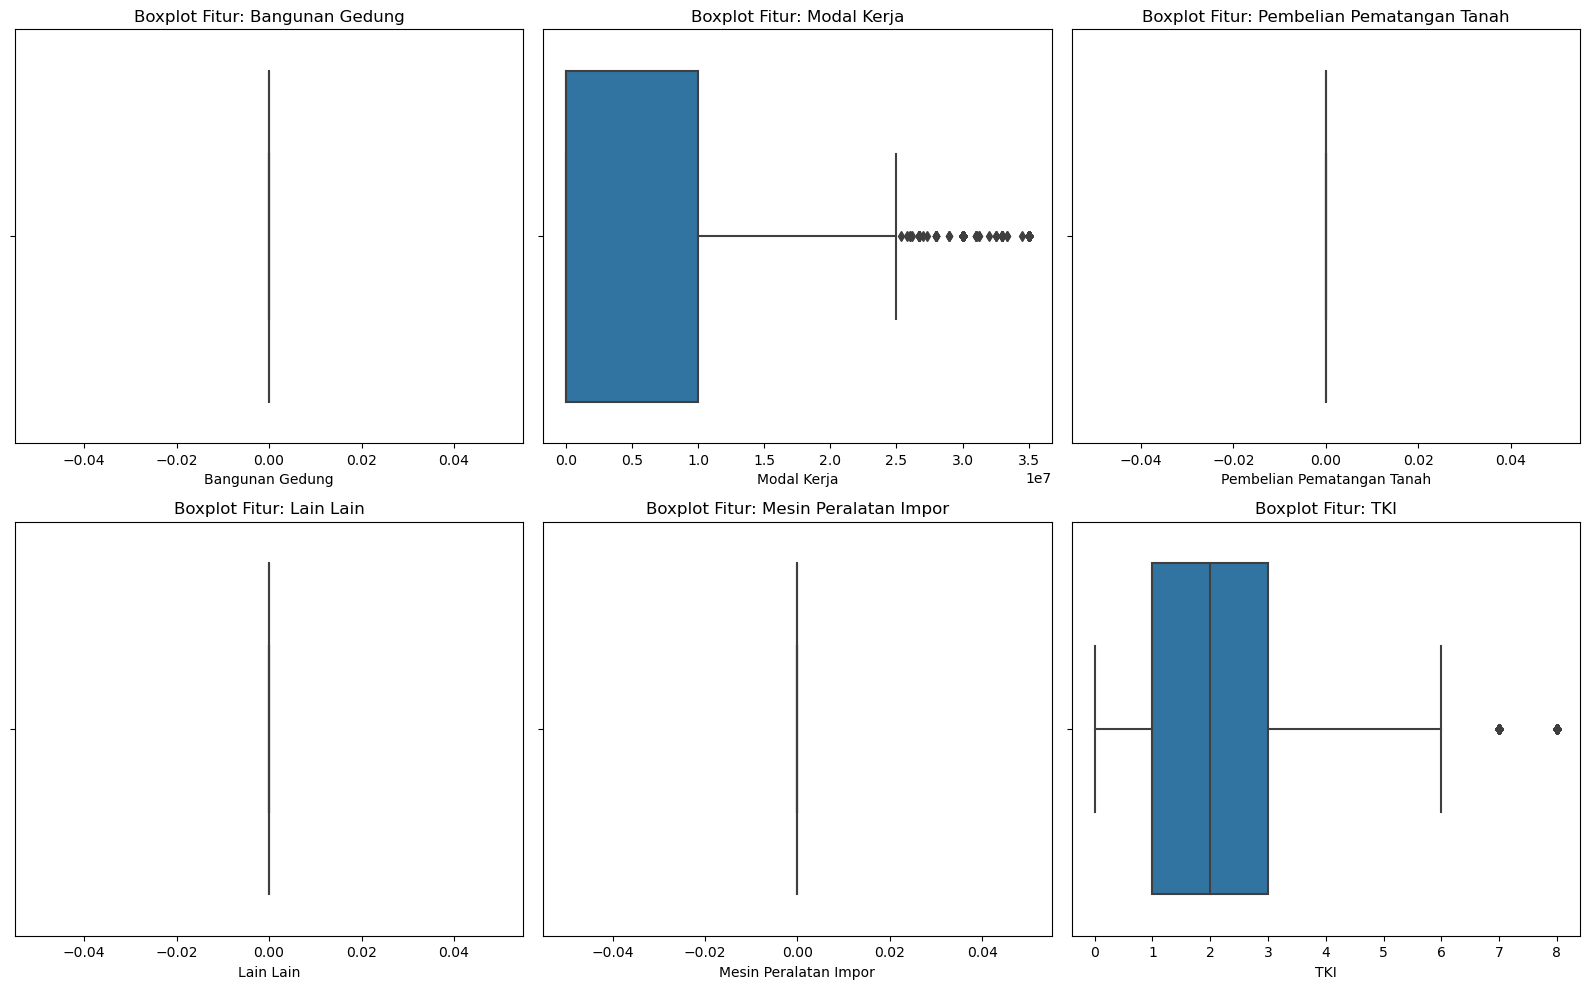

In [ ]:
# Fungsi untuk menghitung IQR dan handle outlier
def handle_outliers_with_threshold(data, col):
    Q1 = data[col].quantile(0.25)  # Kuartil bawah
    Q3 = data[col].quantile(0.75)  # Kuartil atas
    IQR = Q3 - Q1                  # Rentang Interkuartil
    
    # Tetapkan batas threshold atas dan bawah
    lower_bound = Q1 - 2.5 * IQR
    upper_bound = Q3 + 2.5 * IQR
    
    # Handling outliers: Set nilai outlier ke batas threshold
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)
    
    return lower_bound, upper_bound

# Iterasi untuk semua fitur dengan korelasi tinggi terhadap 'jumlah_investasi'
for col in high_corr_features_list:
    lower_bound, upper_bound = handle_outliers_with_threshold(data, col)
    print(f"{col}:")
    print(f"  Interquartile Range (IQR): {data[col].quantile(0.25)} - {data[col].quantile(0.75)}")
    print(f"  Threshold Bawah: {lower_bound}, Threshold Atas: {upper_bound}")
    print()

# Membuat boxplot setelah handle outlier
plt.figure(figsize=(16, 10))
for i, col in enumerate(high_corr_features_list, 1):
    plt.subplot(2, 3, i)  # 2 baris, 3 kolom
    sns.boxplot(data[col])
    plt.title(f'Boxplot Fitur: {col}')
plt.tight_layout()
plt.show()

Bangunan Gedung:
  Interquartile Range (IQR): 0.0 - 0.0
  Threshold Bawah: 0.0, Threshold Atas: 0.0
  Mean setelah standarisasi: 0.0
  Standard Deviation setelah standarisasi: 0.0

Modal Kerja:
  Interquartile Range (IQR): 0.0 - 10000000.0
  Threshold Bawah: -25000000.0, Threshold Atas: 35000000.0
  Mean setelah standarisasi: 6.061399779859992e-17
  Standard Deviation setelah standarisasi: 1.0000151794594478

Pembelian Pematangan Tanah:
  Interquartile Range (IQR): 0.0 - 0.0
  Threshold Bawah: 0.0, Threshold Atas: 0.0
  Mean setelah standarisasi: 0.0
  Standard Deviation setelah standarisasi: 0.0

Lain Lain:
  Interquartile Range (IQR): 0.0 - 0.0
  Threshold Bawah: 0.0, Threshold Atas: 0.0
  Mean setelah standarisasi: 0.0
  Standard Deviation setelah standarisasi: 0.0

Mesin Peralatan Impor:
  Interquartile Range (IQR): 0.0 - 0.0
  Threshold Bawah: 0.0, Threshold Atas: 0.0
  Mean setelah standarisasi: 0.0
  Standard Deviation setelah standarisasi: 0.0

TKI:
  Interquartile Range (IQR):

c:\Users\Widnyana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Widnyana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Widnyana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Widnyana\anac

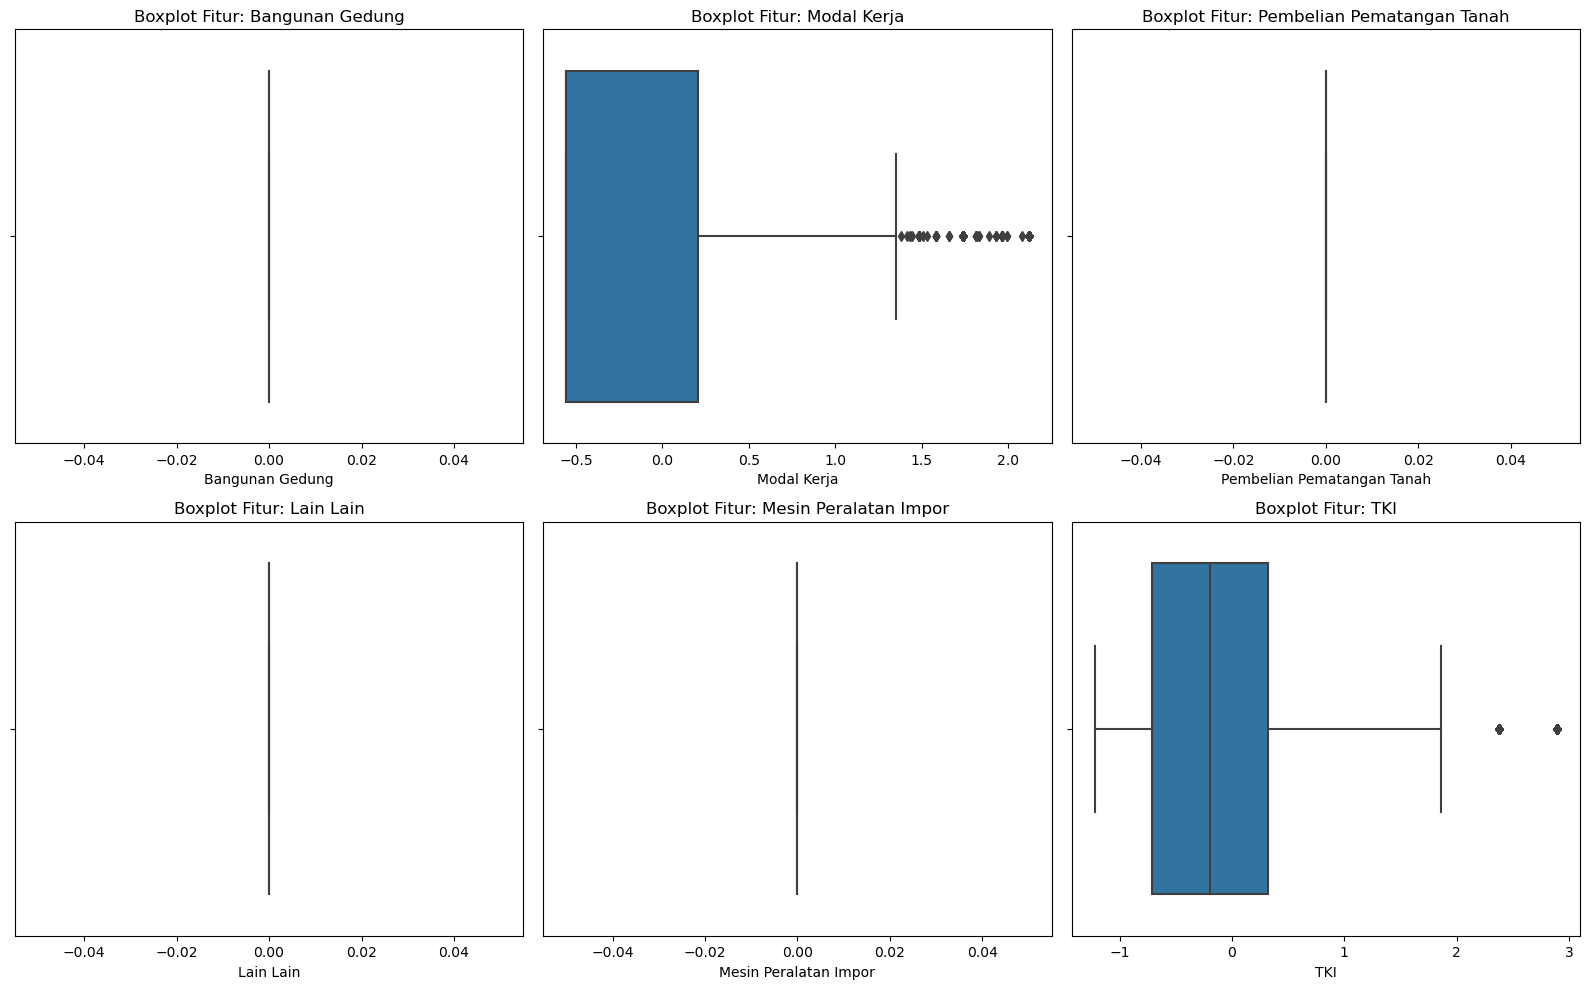

In [ ]:
from sklearn.preprocessing import StandardScaler
# Fungsi untuk standarisasi data
def standardize_data(data, col):
    scaler = StandardScaler()
    data[[col]] = scaler.fit_transform(data[[col]])
    return scaler

# Iterasi untuk semua fitur dengan korelasi tinggi terhadap 'jumlah_investasi'
for col in high_corr_features_list:
    lower_bound, upper_bound = handle_outliers_with_threshold(data, col)
    print(f"{col}:")
    print(f"  Interquartile Range (IQR): {data[col].quantile(0.25)} - {data[col].quantile(0.75)}")
    print(f"  Threshold Bawah: {lower_bound}, Threshold Atas: {upper_bound}")
    
    # Standarisasi data setelah menangani outlier
    standardizer = standardize_data(data, col)
    print(f"  Mean setelah standarisasi: {data[col].mean()}")
    print(f"  Standard Deviation setelah standarisasi: {data[col].std()}")
    print()

# Membuat boxplot setelah menangani outlier dan standarisasi
plt.figure(figsize=(16, 10))
for i, col in enumerate(high_corr_features_list, 1):
    plt.subplot(2, 3, i)  # 2 baris, 3 kolom
    sns.boxplot(data[col])
    plt.title(f'Boxplot Fitur: {col}')
plt.tight_layout()
plt.show()

In [ ]:
# Daftar kolom yang memiliki standard deviation = 0 setelah standarisasi
columns_with_zero_std = ["Bangunan Gedung", "Pembelian Pematangan Tanah", "Lain Lain", "Mesin Peralatan Impor"]

# Loop untuk mencetak isi kolom yang memiliki standar deviasi 0
for col in columns_with_zero_std:
    print(f"Isi data pada kolom '{col}':")
    print(data[col].unique())  # Mencetak nilai unik pada kolom tersebut
    print()


Isi data pada kolom 'Bangunan Gedung':
[0.]

Isi data pada kolom 'Pembelian Pematangan Tanah':
[0.]

Isi data pada kolom 'Lain Lain':
[0.]

Isi data pada kolom 'Mesin Peralatan Impor':
[0.]



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32940 entries, 1 to 47361
Data columns (total 39 columns):
 #   Column                                                                            Non-Null Count  Dtype         
---  ------                                                                            --------------  -----         
 0   Tanggal Terbit Oss                                                                32940 non-null  datetime64[ns]
 1   Kab Kota Usaha                                                                    32940 non-null  int32         
 2   kecamatan_usaha                                                                   32940 non-null  int32         
 3   kelurahan_usaha                                                                   32940 non-null  int32         
 4   Judul Kbli                                                                        32940 non-null  int32         
 5   KL/Sektor Pembina                                           

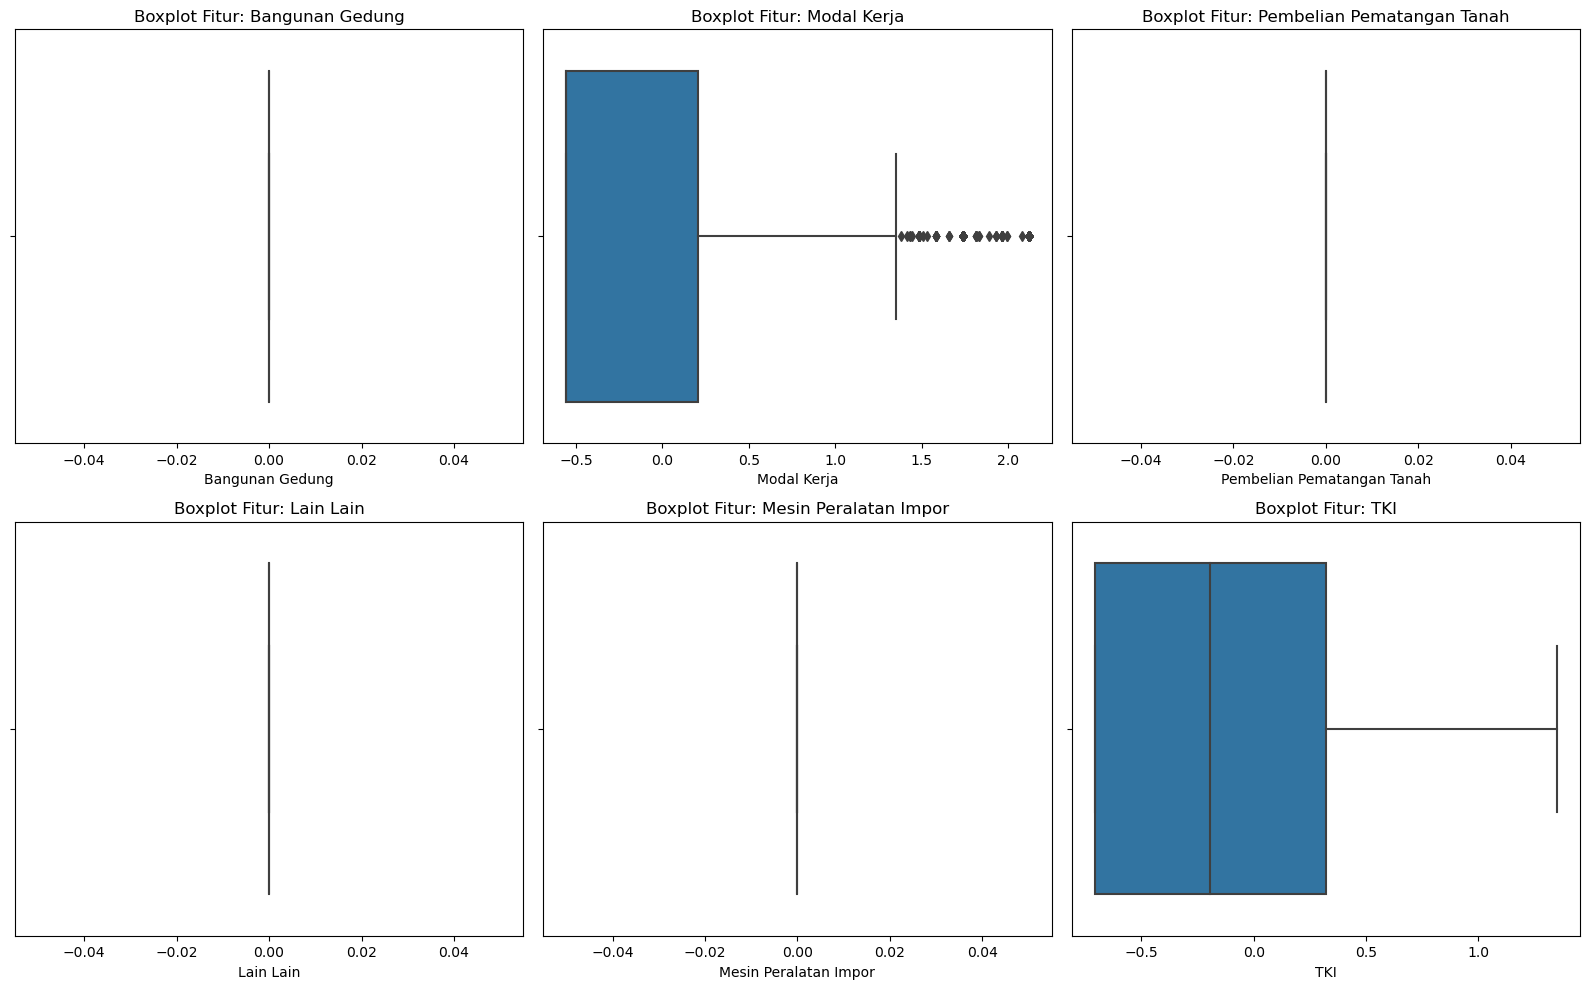

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variabel 'data' sudah disimpan sebelumnya, kita gunakan dataset ini
df = data.copy()

# Daftar kolom yang memiliki korelasi tinggi terhadap 'jumlah_investasi'
high_corr_features_list = ['Bangunan Gedung', 'Modal Kerja', 'Pembelian Pematangan Tanah', 
                           'Lain Lain', 'Mesin Peralatan Impor', 'TKI']

# Convert specific columns to numeric, coercing errors to NaN if necessary
df[high_corr_features_list] = df[high_corr_features_list].apply(pd.to_numeric, errors='coerce')

# Define the threshold function to cap outliers
def cap_outliers(col, low_thresh=0.1, high_thresh=0.9):
    low, high = np.percentile(col.dropna(), [low_thresh * 100, high_thresh * 100])  # Drop NaNs for percentile calculation
    col = np.where(col < low, low, col)
    col = np.where(col > high, high, col)
    return col

# Apply the threshold handling only to the high_corr_features_list
for col in high_corr_features_list:
    df[col] = cap_outliers(df[col])

# Visualizing the adjusted data with boxplots
plt.figure(figsize=(16, 10))
for i, col in enumerate(high_corr_features_list, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns layout
    sns.boxplot(x=df[col])  # Specify x=df[col] to avoid the TypeError
    plt.title(f'Boxplot Fitur: {col}')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

# Kolom fitur dan target
feature_columns = ['Modal Kerja','TKI']
target_column = 'Jumlah Investasi'
# Pisahkan fitur dan target
X = df[feature_columns]
y = df[target_column]

# --- MODEL REGRESI LINEAR ---
print("Evaluasi Model Regresi Linear:\n")

# Bagi data menjadi training dan testing set
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model regresi linear
linear_model = LinearRegression()

# Train model regresi linear
linear_model.fit(X_train_reg, y_train_reg)

# Prediksi menggunakan model regresi linear
y_pred_reg = linear_model.predict(X_test_reg)

# Evaluasi model regresi linear
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")
print()

# --- MODEL LOGISTIC REGRESSION ---
print("Evaluasi Model Logistic Regression:\n")

# Membuat target biner (kategori rendah [0] dan tinggi [1]) berdasarkan nilai rata-rata investasi
y_binary = (y > y.mean()).astype(int)

# Bagi data menjadi training dan testing set untuk logistic regression
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_binary, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(max_iter=1000, class_weight='balanced')
logistic_model.fit(X_train_class, y_train_class)


# Prediksi menggunakan model logistic regression
y_pred_class = logistic_model.predict(X_test_class)

# Evaluasi model logistic regression
accuracy = accuracy_score(y_test_class, y_pred_class)
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
class_report = classification_report(y_test_class, y_pred_class)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Evaluasi Model Regresi Linear:

Mean Squared Error (MSE): 1.3393213812472461e+21
R^2 Score: 0.005500878531720099

Evaluasi Model Logistic Regression:

Accuracy: 0.8163327261687917
Confusion Matrix:
[[5122 1116]
 [  94  256]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      6238
           1       0.19      0.73      0.30       350

    accuracy                           0.82      6588
   macro avg       0.58      0.78      0.60      6588
weighted avg       0.94      0.82      0.86      6588



In [ ]:
# Fungsi untuk mendeteksi outlier berdasarkan IQR
def count_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# List fitur dengan korelasi tinggi terhadap 'jumlah_investasi'
high_corr_features_list = ['Bangunan Gedung', 'Modal Kerja', 'Pembelian Pematangan Tanah', 
                           'Lain Lain', 'Mesin Peralatan Impor', 'TKI']

# Menghitung jumlah outlier per fitur berdasarkan IQR
outliers_count_iqr = {}
for feature in high_corr_features_list:
    outliers_count_iqr[feature] = count_outliers_iqr(data, feature)

# Menampilkan jumlah outlier per fitur
print("Jumlah outlier berdasarkan IQR per fitur:")
for feature, count in outliers_count_iqr.items():
    print(f"{feature}: {count} outlier(s)")


Jumlah outlier berdasarkan IQR per fitur:
Bangunan Gedung: 0 outlier(s)
Modal Kerja: 5661 outlier(s)
Pembelian Pematangan Tanah: 0 outlier(s)
Lain Lain: 0 outlier(s)
Mesin Peralatan Impor: 0 outlier(s)
TKI: 2279 outlier(s)


In [ ]:
from scipy import stats

# Fungsi untuk mendeteksi outlier berdasarkan Z-score
def count_outliers_zscore(df, column, threshold=3):
    z_scores = stats.zscore(df[column])
    outliers = df[(abs(z_scores) > threshold)]
    return len(outliers)

# Menghitung jumlah outlier per fitur berdasarkan Z-score
outliers_count_zscore = {}
for feature in high_corr_features_list:
    outliers_count_zscore[feature] = count_outliers_zscore(data, feature)

# Menampilkan jumlah outlier per fitur
print("Jumlah outlier berdasarkan Z-score per fitur:")
for feature, count in outliers_count_zscore.items():
    print(f"{feature}: {count} outlier(s)")


Jumlah outlier berdasarkan Z-score per fitur:
Bangunan Gedung: 0 outlier(s)
Modal Kerja: 0 outlier(s)
Pembelian Pematangan Tanah: 0 outlier(s)
Lain Lain: 0 outlier(s)
Mesin Peralatan Impor: 0 outlier(s)
TKI: 0 outlier(s)


(32940, 6)


c:\Users\Widnyana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Widnyana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Widnyana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Widnyana\anac

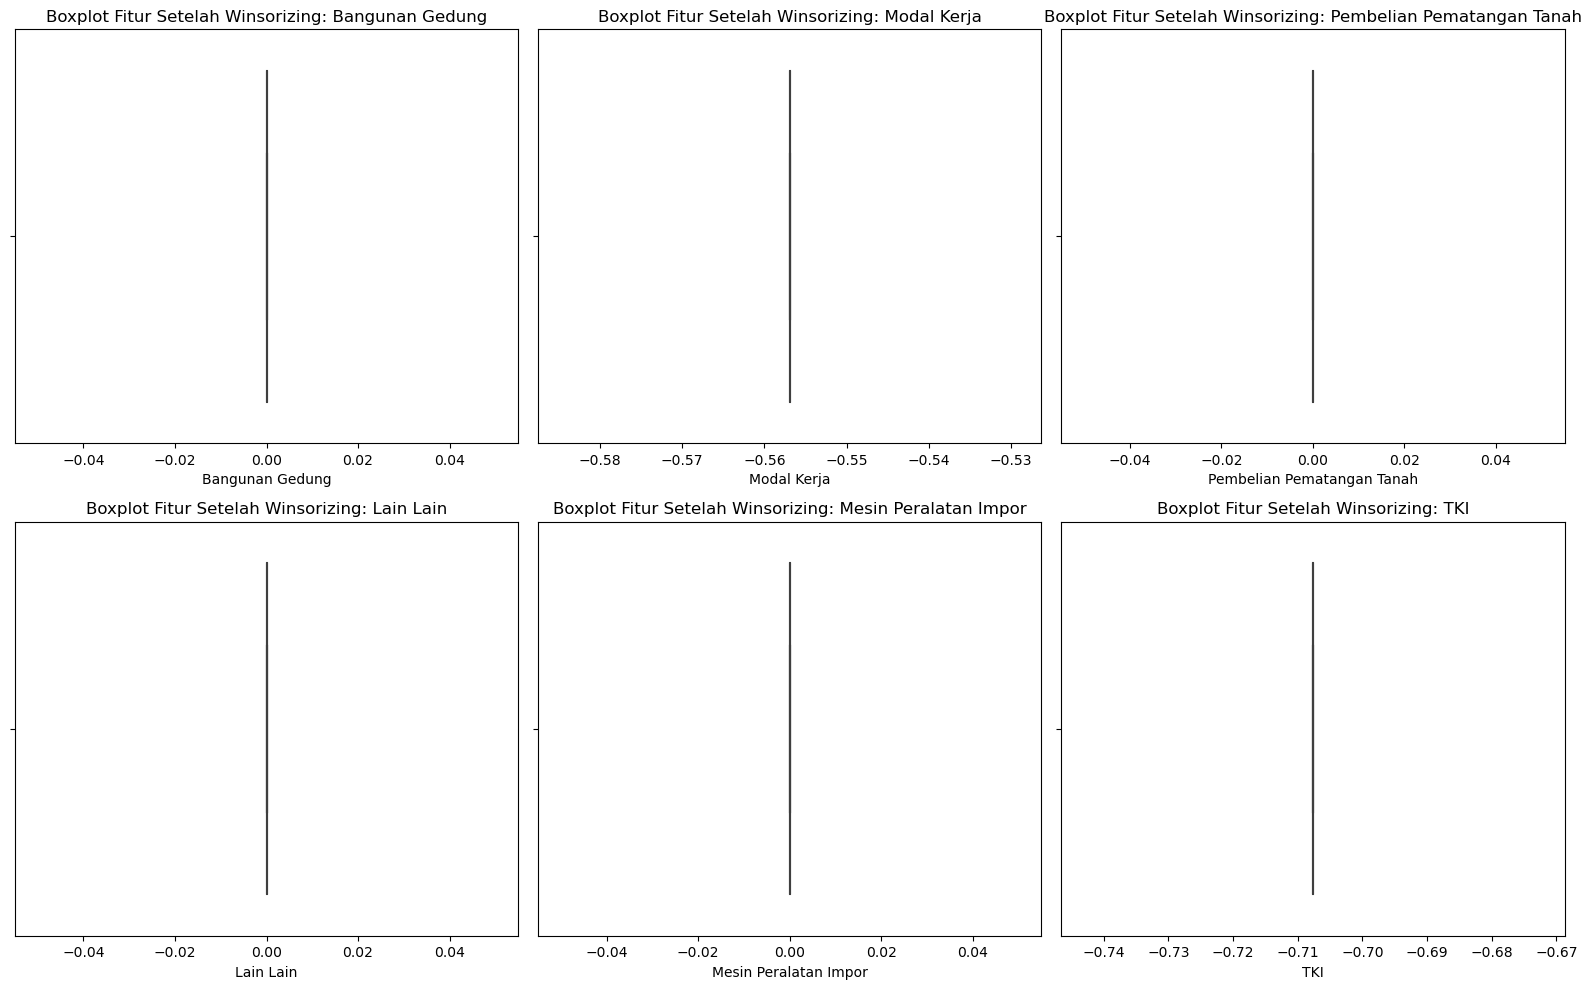

In [ ]:
from scipy.stats import mstats

# Winsorizing untuk membatasi nilai outlier
def winsorize_column(df, column, limits=[0.01, 0.99]):  # Batasi pada persentil 1% - 99%
    df[column] = mstats.winsorize(df[column], limits=limits)
    return df

# Terapkan winsorizing pada fitur-fitur dengan outlier
for feature in high_corr_features_list:
    data = winsorize_column(data, feature)

# Cek hasilnya
print(data[high_corr_features_list].shape)

# Cek distribusi setelah winsorizing
plt.figure(figsize=(16, 10))
for i, col in enumerate(high_corr_features_list, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data[col])
    plt.title(f'Boxplot Fitur Setelah Winsorizing: {col}')
plt.tight_layout()
plt.show()


In [ ]:
# Cek jumlah baris dan kolom dataset setelah penghapusan outlier
print(data[features_to_normalize].shape)

# Jika dataset kosong, mungkin semua baris yang dianggap outlier telah terhapus
# Solusi: Cek kondisi dan batasan outlier, atau pertimbangkan metode lain (winsorizing, transformasi log)


NameError: name 'features_to_normalize' is not defined

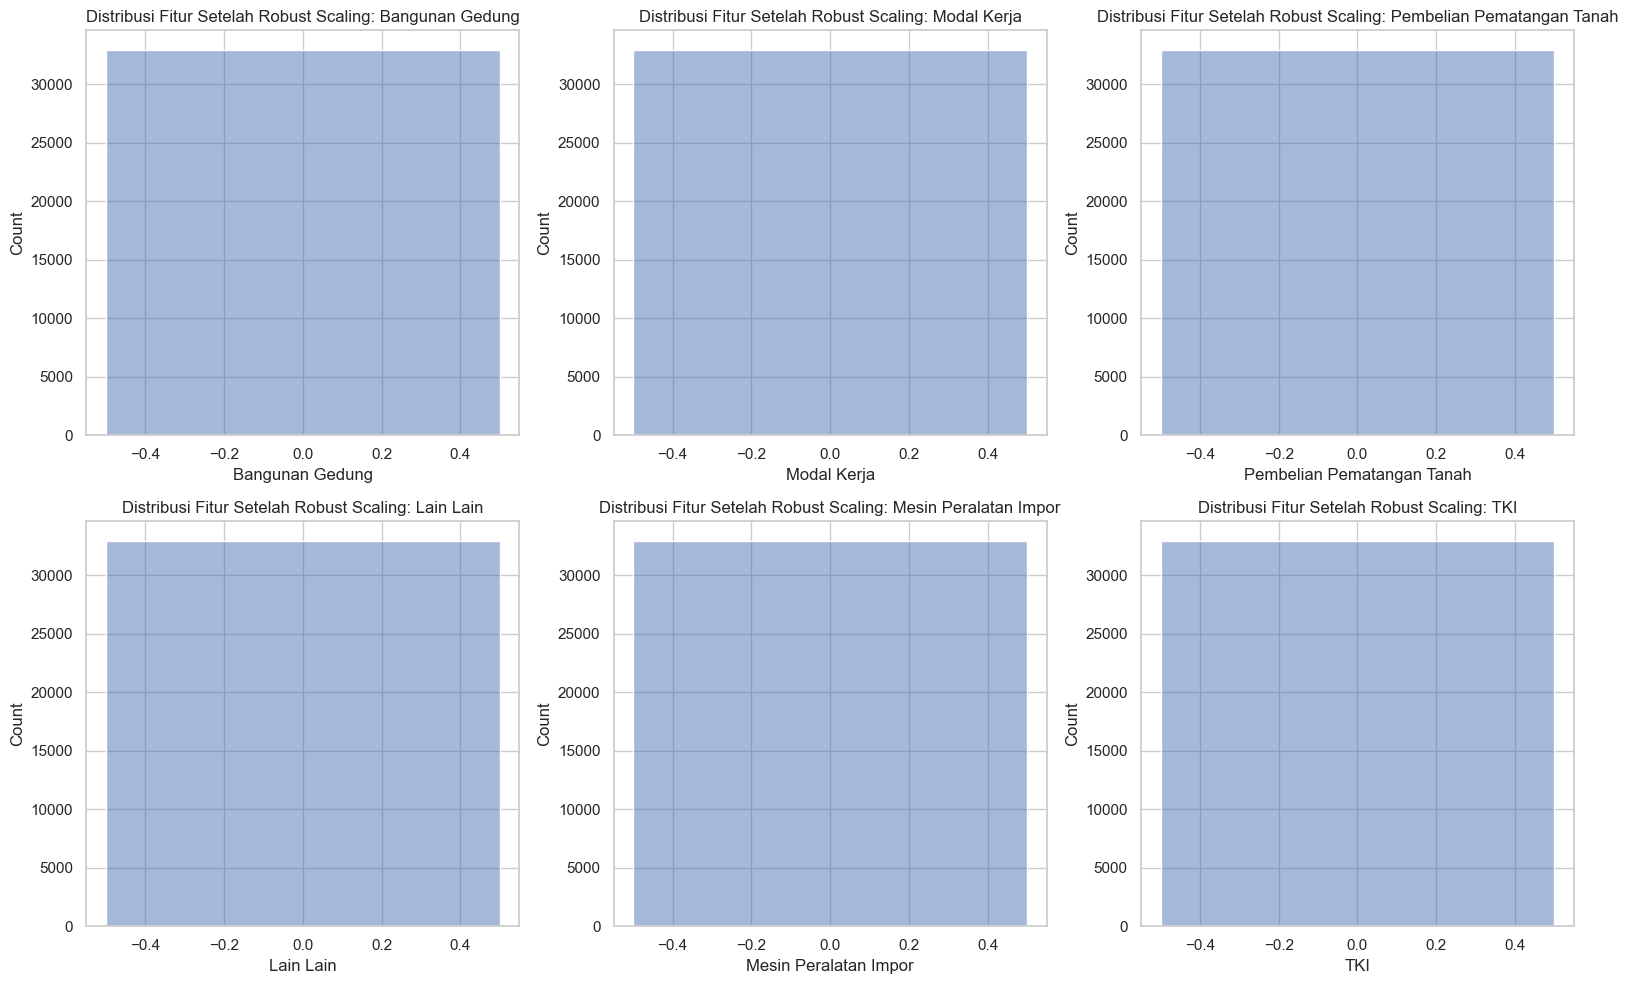

In [ ]:
from sklearn.preprocessing import RobustScaler

# Inisialisasi RobustScaler
robust_scaler = RobustScaler()

# Normalisasi fitur-fitur tersebut menggunakan RobustScaler
data[features_to_normalize] = robust_scaler.fit_transform(data[features_to_normalize])

# Cek distribusi setelah normalisasi dengan RobustScaler
plt.figure(figsize=(16, 10))
for i, col in enumerate(features_to_normalize, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribusi Fitur Setelah Robust Scaling: {col}')
plt.tight_layout()
plt.show()


Mean Squared Error (MSE): 1.3468010586560696e+21
R-squared (R²): -5.307790927533418e-05


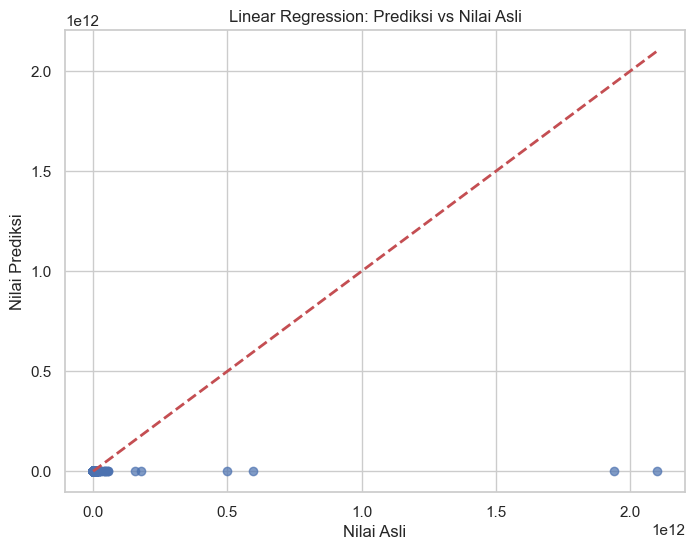

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Pisahkan fitur (X) dan target (y)
X = data[features_to_normalize]  # Fitur-fitur yang sudah dinormalisasi
y = data['Jumlah Investasi']     # Target atau label

# 2. Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Inisialisasi dan latih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Prediksi hasil pada data uji
y_pred = model.predict(X_test)

# 5. Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Cetak hasil evaluasi
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# 6. Plot hasil prediksi vs nilai asli
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Nilai Asli')
plt.ylabel('Nilai Prediksi')
plt.title('Linear Regression: Prediksi vs Nilai Asli')
plt.show()


Evaluasi Model Lasso Regression:
R^2 Score: -0.00
Mean Absolute Error (MAE): 2686387799.22
Mean Squared Error (MSE): 1346801058656069615616.00


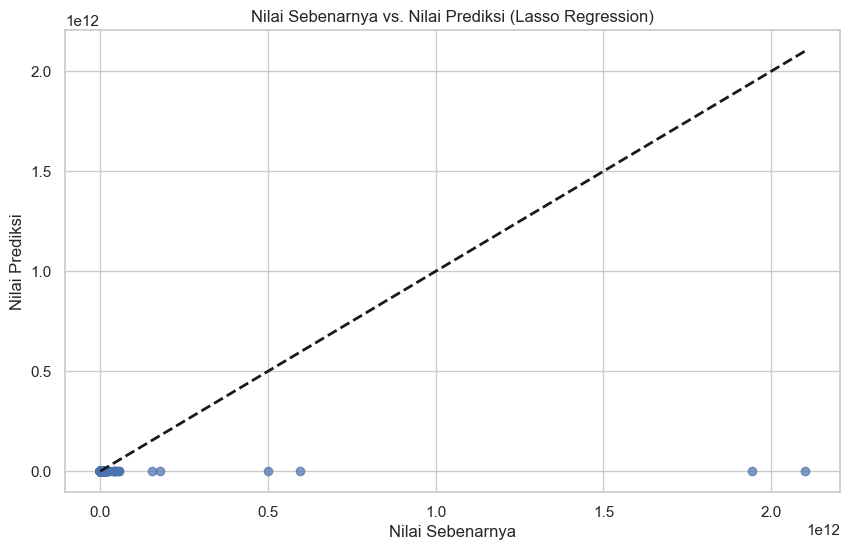

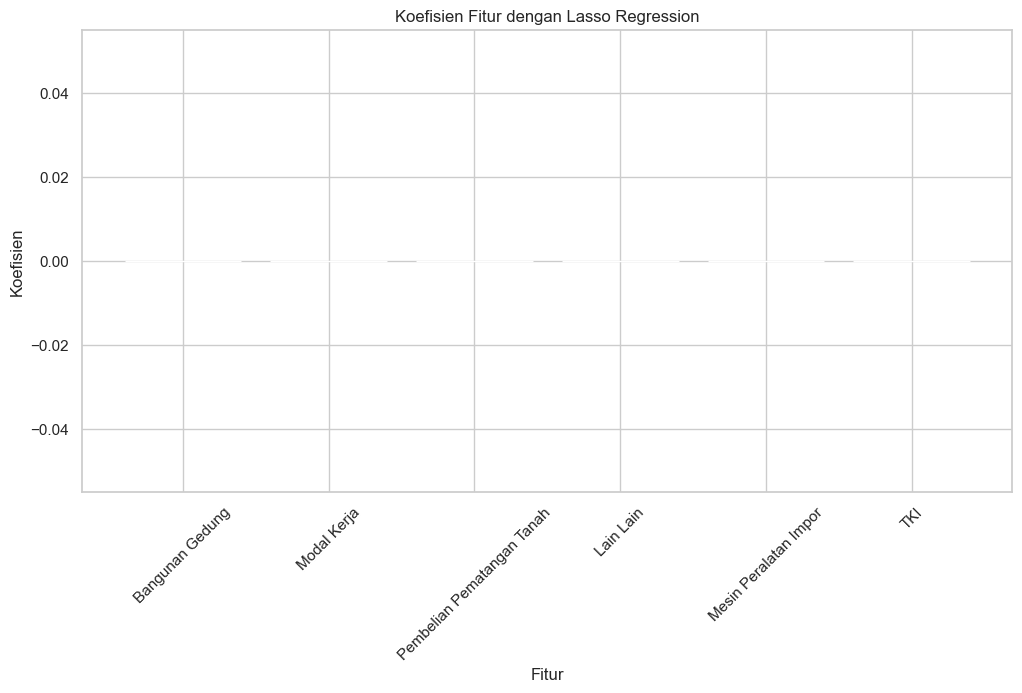

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Inisialisasi Lasso Regression
lasso_model = Lasso(alpha=1.0)  # alpha adalah parameter regularisasi

# Latih model dengan data pelatihan
lasso_model.fit(X_train, y_train)

# Lakukan prediksi dengan data pengujian
y_pred_lasso = lasso_model.predict(X_test)

# Evaluasi model
print("Evaluasi Model Lasso Regression:")
print(f"R^2 Score: {r2_score(y_test, y_pred_lasso):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_lasso):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_lasso):.2f}")

# Visualisasi hasil prediksi vs. nilai sebenarnya
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.7)
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Nilai Prediksi')
plt.title('Nilai Sebenarnya vs. Nilai Prediksi (Lasso Regression)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

# Visualisasi koefisien fitur
plt.figure(figsize=(12, 6))
plt.bar(features_to_normalize, lasso_model.coef_)
plt.xlabel('Fitur')
plt.ylabel('Koefisien')
plt.title('Koefisien Fitur dengan Lasso Regression')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Fitur yang memiliki korelasi tinggi dengan 'Jumlah Investasi'
features_to_check = high_corr_features.index.drop('Jumlah Investasi')

# Mendeteksi outlier dengan metode IQR
for feature in features_to_check:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Mendapatkan data outlier
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    
    print(f"Outlier pada fitur '{feature}':")
    print(outliers[[feature]])
    print("\n")

Outlier pada fitur 'Bangunan Gedung':
Empty DataFrame
Columns: [Bangunan Gedung]
Index: []


Outlier pada fitur 'Modal Kerja':
Empty DataFrame
Columns: [Modal Kerja]
Index: []


Outlier pada fitur 'Pembelian Pematangan Tanah':
Empty DataFrame
Columns: [Pembelian Pematangan Tanah]
Index: []


Outlier pada fitur 'Lain Lain':
Empty DataFrame
Columns: [Lain Lain]
Index: []


Outlier pada fitur 'Mesin Peralatan Impor':
Empty DataFrame
Columns: [Mesin Peralatan Impor]
Index: []


Outlier pada fitur 'TKI':
Empty DataFrame
Columns: [TKI]
Index: []




c:\Users\Widnyana\anaconda3\lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Widnyana\anaconda3\lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Widnyana\anaconda3\lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Widnyana\anaconda3\lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Widnyana\anaconda3\lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Widnyana\anaconda3\lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask'

In [ ]:
def detect_outliers_iqr(df, feature):
    """
    Mengidentifikasi outlier menggunakan metode IQR.
    
    Args:
    df (pd.DataFrame): DataFrame yang berisi data.
    feature (str): Nama fitur untuk deteksi outlier.
    
    Returns:
    pd.DataFrame: DataFrame dengan kolom outlier yang menunjukkan True jika data adalah outlier.
    """
    # Menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    
    # Menghitung IQR (interquartile range)
    IQR = Q3 - Q1
    
    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Menentukan outlier
    df[f'{feature}_outlier'] = (df[feature] < lower_bound) | (df[feature] > upper_bound)
    
    return df

# Daftar fitur yang akan dideteksi outliernya
features_to_check = [
    'Bangunan Gedung', 'Modal Kerja', 'Pembelian Pematangan Tanah',
    'Lain Lain', 'Mesin Peralatan Impor', 'TKI'
]

# Mendekteksi outlier pada setiap fitur
for feature in features_to_check:
    data = detect_outliers_iqr(data, feature)

# Menampilkan beberapa baris data setelah deteksi outlier
print(data.head())

   Tanggal Terbit Oss  Kab Kota Usaha  kecamatan_usaha  kelurahan_usaha  \
1          2018-08-08               0                3               57   
2          2018-08-13               0                2               20   
10         2018-08-20               0                2               38   
11         2018-08-23               0                3               26   
12         2018-08-28               0                2               20   

    Judul Kbli  KL/Sektor Pembina  luas_tanah  Mesin Peralatan  \
1          633                 13      500.00              0.0   
2          208                 18        5.55              0.0   
10         975                 13      191.00       70000000.0   
11         946                 13      766.00       29060458.0   
12         908                 16       10.00        1000000.0   

    Mesin Peralatan Impor  Pembelian Pematangan Tanah  ...  \
1                     0.0                         0.0  ...   
2                     0.0   

c:\Users\Widnyana\anaconda3\lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Widnyana\anaconda3\lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Widnyana\anaconda3\lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Widnyana\anaconda3\lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Widnyana\anaconda3\lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Widnyana\anaconda3\lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask'

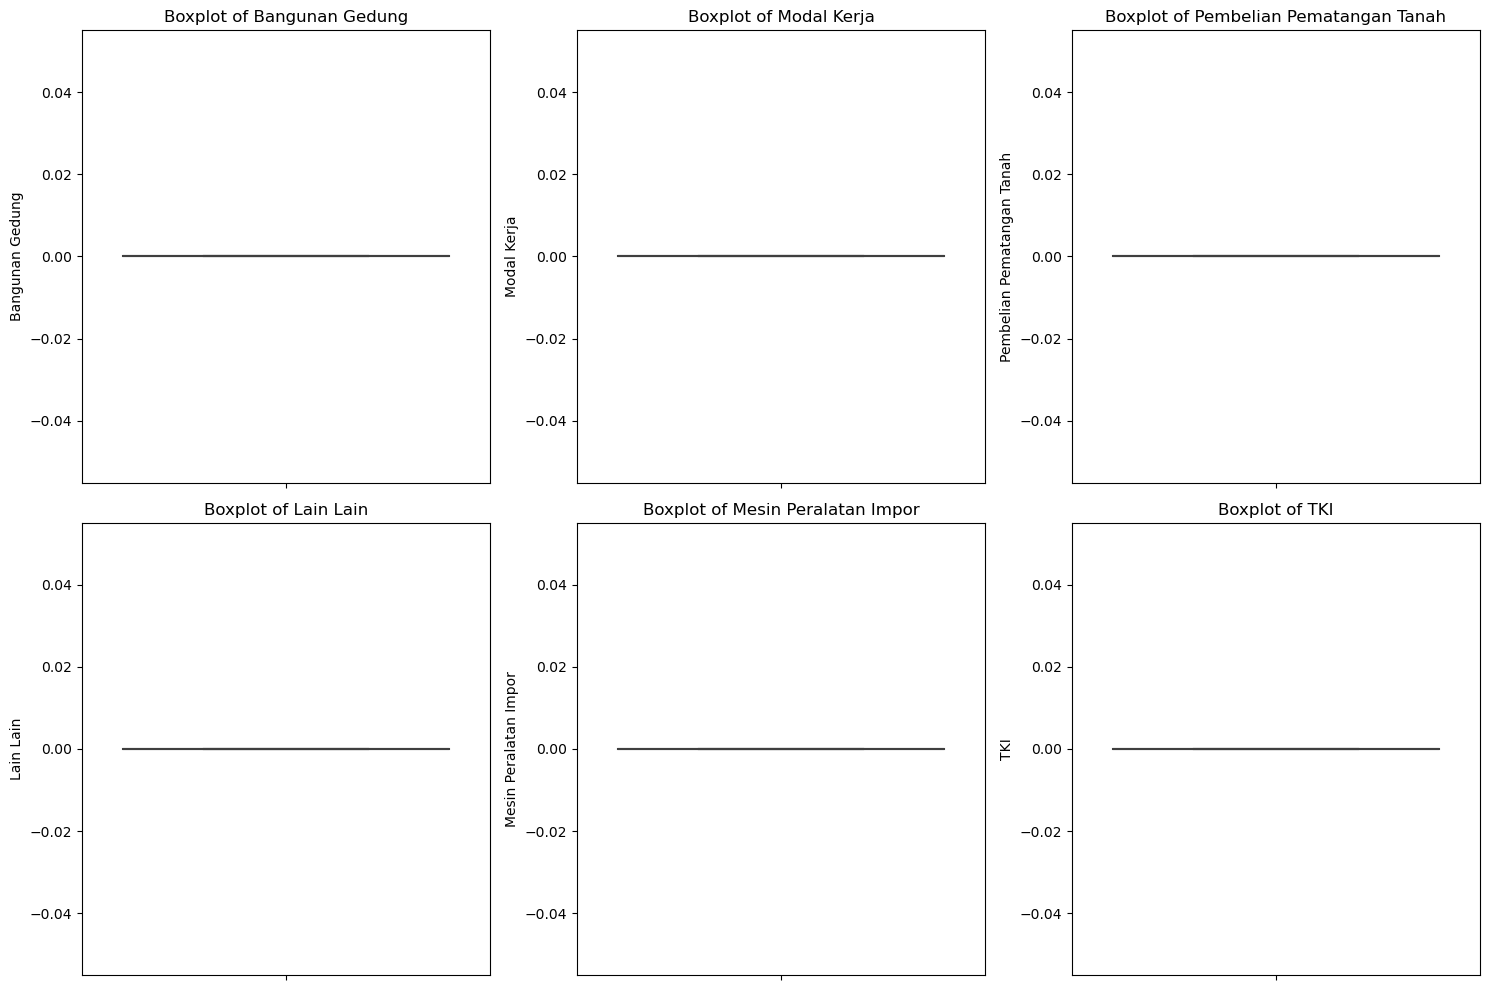

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fitur yang memiliki korelasi tinggi dengan 'Jumlah Investasi'
features_to_check = high_corr_features.index.drop('Jumlah Investasi')

# Ukuran plot
plt.figure(figsize=(15, 10))

# Membuat boxplot untuk setiap fitur
for i, feature in enumerate(features_to_check, 1):
    plt.subplot(2, 3, i)  # Membuat subplot (2 baris, 3 kolom)
    sns.boxplot(y=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)

# Menampilkan plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Daftar kolom outlier yang digunakan untuk memfilter
features_with_outliers = [
    'Bangunan Gedung_outlier', 'Modal Kerja_outlier',
    'Pembelian Pematangan Tanah_outlier', 'Lain Lain_outlier',
    'Mesin Peralatan Impor_outlier', 'TKI_outlier'
]

# Menghapus baris yang memiliki outlier di salah satu fitur
filtered_data = data[~data[features_with_outliers].any(axis=1)]

# Menampilkan data setelah penghapusan outlier
print("Data setelah menghapus outlier:")
print(filtered_data.head())

# Jika perlu, reset index pada DataFrame yang sudah difilter
filtered_data.reset_index(drop=True, inplace=True)


Data setelah menghapus outlier:
   Tanggal Terbit Oss  Kab Kota Usaha  kecamatan_usaha  kelurahan_usaha  \
1          2018-08-08               0                3               57   
2          2018-08-13               0                2               20   
10         2018-08-20               0                2               38   
11         2018-08-23               0                3               26   
12         2018-08-28               0                2               20   

    Judul Kbli  KL/Sektor Pembina  luas_tanah  Mesin Peralatan  \
1          633                 13      500.00              0.0   
2          208                 18        5.55              0.0   
10         975                 13      191.00       70000000.0   
11         946                 13      766.00       29060458.0   
12         908                 16       10.00        1000000.0   

    Mesin Peralatan Impor  Pembelian Pematangan Tanah  ...  \
1                     0.0                         0.0  ...

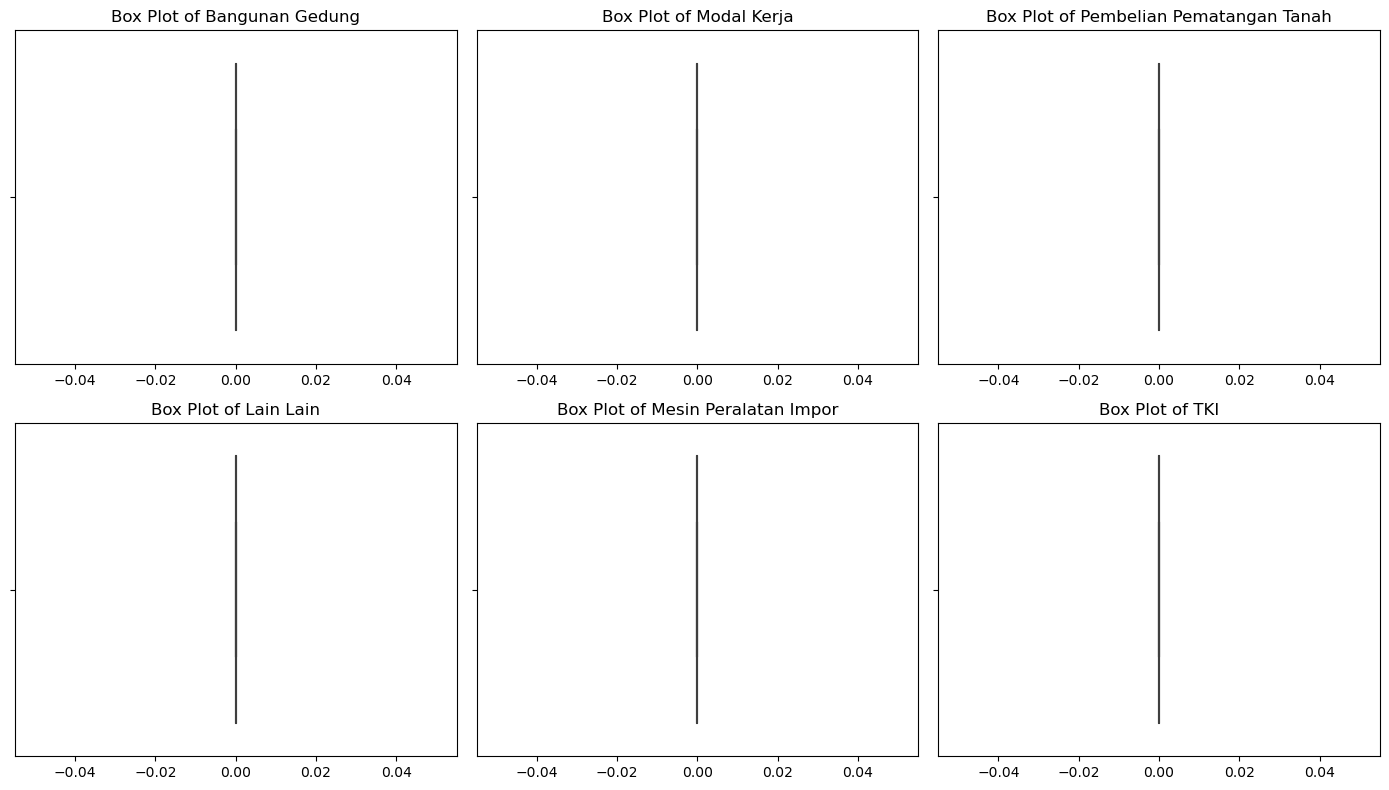

In [ ]:
# Daftar fitur yang ingin divisualisasikan
features_to_plot = [
    'Bangunan Gedung', 'Modal Kerja',
    'Pembelian Pematangan Tanah', 'Lain Lain',
    'Mesin Peralatan Impor', 'TKI'
]

# Plot box plot untuk setiap fitur
plt.figure(figsize=(14, 8))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=filtered_data, x=feature)
    plt.title(f'Box Plot of {feature}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32940 entries, 1 to 47361
Data columns (total 45 columns):
 #   Column                                                                            Non-Null Count  Dtype         
---  ------                                                                            --------------  -----         
 0   Tanggal Terbit Oss                                                                32940 non-null  datetime64[ns]
 1   Kab Kota Usaha                                                                    32940 non-null  int32         
 2   kecamatan_usaha                                                                   32940 non-null  int32         
 3   kelurahan_usaha                                                                   32940 non-null  int32         
 4   Judul Kbli                                                                        32940 non-null  int32         
 5   KL/Sektor Pembina                                           

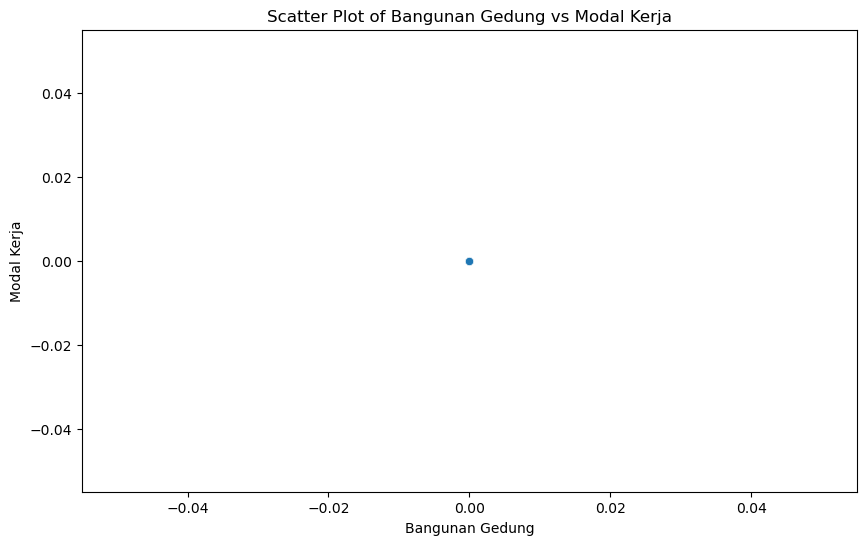

In [ ]:
# Contoh scatter plot antara 'Bangunan Gedung' dan 'Modal Kerja'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='Bangunan Gedung', y='Modal Kerja')
plt.title('Scatter Plot of Bangunan Gedung vs Modal Kerja')
plt.xlabel('Bangunan Gedung')
plt.ylabel('Modal Kerja')
plt.show()


In [ ]:

num_rows_before = len(data)

# Menyimpan data yang telah dihapus outlier ke dalam variabel baru
filtered_data = data[~(
    data['Bangunan Gedung_outlier'] |
    data['Modal Kerja_outlier'] |
    data['Pembelian Pematangan Tanah_outlier'] |
    data['Lain Lain_outlier'] |
    data['Mesin Peralatan Impor_outlier'] |
    data['TKI_outlier']
)]

# Menghitung jumlah baris setelah penghapusan outlier
num_rows_after = len(filtered_data)

# Menghitung jumlah baris yang dihapus
num_outliers_removed = num_rows_before - num_rows_after

# Menampilkan jumlah outlier yang dihapus
print(f"Jumlah outlier yang dihapus: {num_outliers_removed}")

Jumlah outlier yang dihapus: 0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Memilih fitur dengan korelasi tinggi terhadap 'Jumlah Investasi'
high_corr_features = ['Bangunan Gedung', 'Modal Kerja', 'Pembelian Pematangan Tanah', 
                      'Lain Lain', 'Mesin Peralatan Impor', 'TKI']

# Pisahkan fitur dan target
X = data[high_corr_features]
y = data['Jumlah Investasi']

# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Melatih dan mengevaluasi setiap model
for name, model in models.items():
    # Melatih model
    model.fit(X_train, y_train)
    
    # Memprediksi hasil
    y_pred = model.predict(X_test)
    
    # Menghitung metrik evaluasi
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Menampilkan hasil evaluasi
    print(f"Model: {name}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R² Score: {r2:.2f}")
    print("-" * 30)


Model: Linear Regression
Mean Absolute Error (MAE): 2686387799.22
Mean Squared Error (MSE): 1346801058656069615616.00
R² Score: -0.00
------------------------------
Model: Random Forest Regressor
Mean Absolute Error (MAE): 2677008514.89
Mean Squared Error (MSE): 1346795558729241591808.00
R² Score: -0.00
------------------------------
Model: Gradient Boosting Regressor
Mean Absolute Error (MAE): 2686387799.22
Mean Squared Error (MSE): 1346801058656069615616.00
R² Score: -0.00
------------------------------


In [ ]:
import pandas as pd
import numpy as np

# Fungsi untuk menghapus outlier berdasarkan IQR
def remove_outliers_iqr(df, column_names):
    for column in column_names:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        # Menentukan batas bawah dan batas atas
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Menghapus outlier
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Kolom fitur dan target
feature_columns = ['Bangunan Gedung', 'Modal Kerja', 'Pembelian Pematangan Tanah', 'Lain Lain', 'Mesin Peralatan Impor', 'TKI']
target_column = 'Jumlah Investasi'

# Menghapus outlier dari kolom fitur dan target
data_clean = remove_outliers_iqr(data.copy(), feature_columns + [target_column])

# Memeriksa data setelah pembersihan outlier
print(f"Jumlah data sebelum pembersihan: {len(data)}")
print(f"Jumlah data setelah pembersihan: {len(data_clean)}")


Jumlah data sebelum pembersihan: 32940
Jumlah data setelah pembersihan: 27556


c:\Users\Widnyana\anaconda3\lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Widnyana\anaconda3\lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


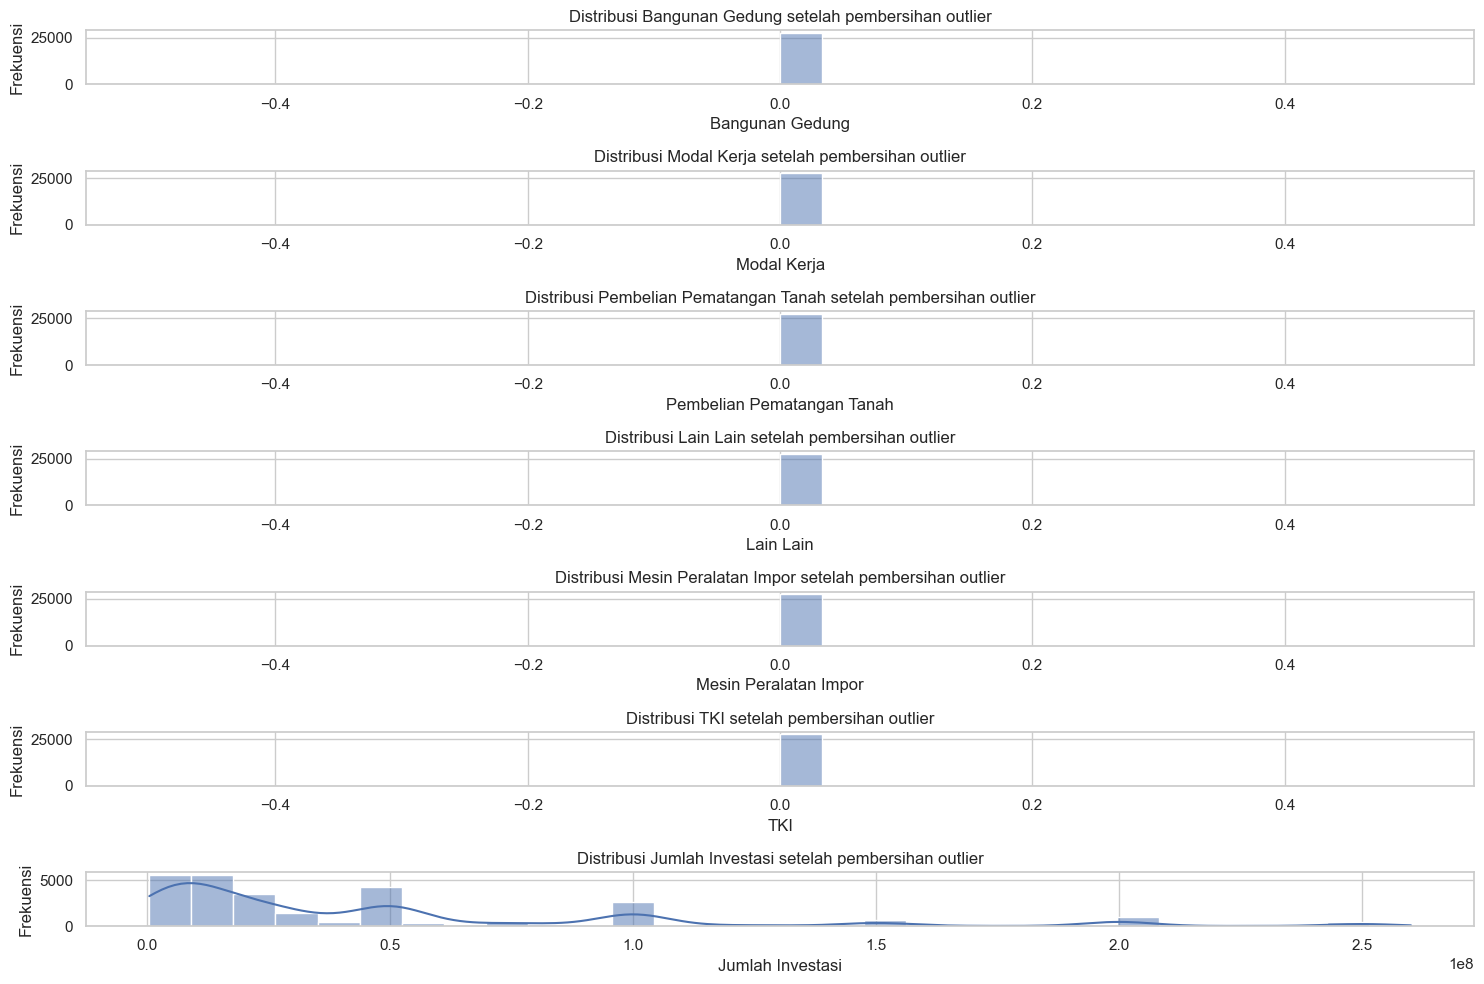

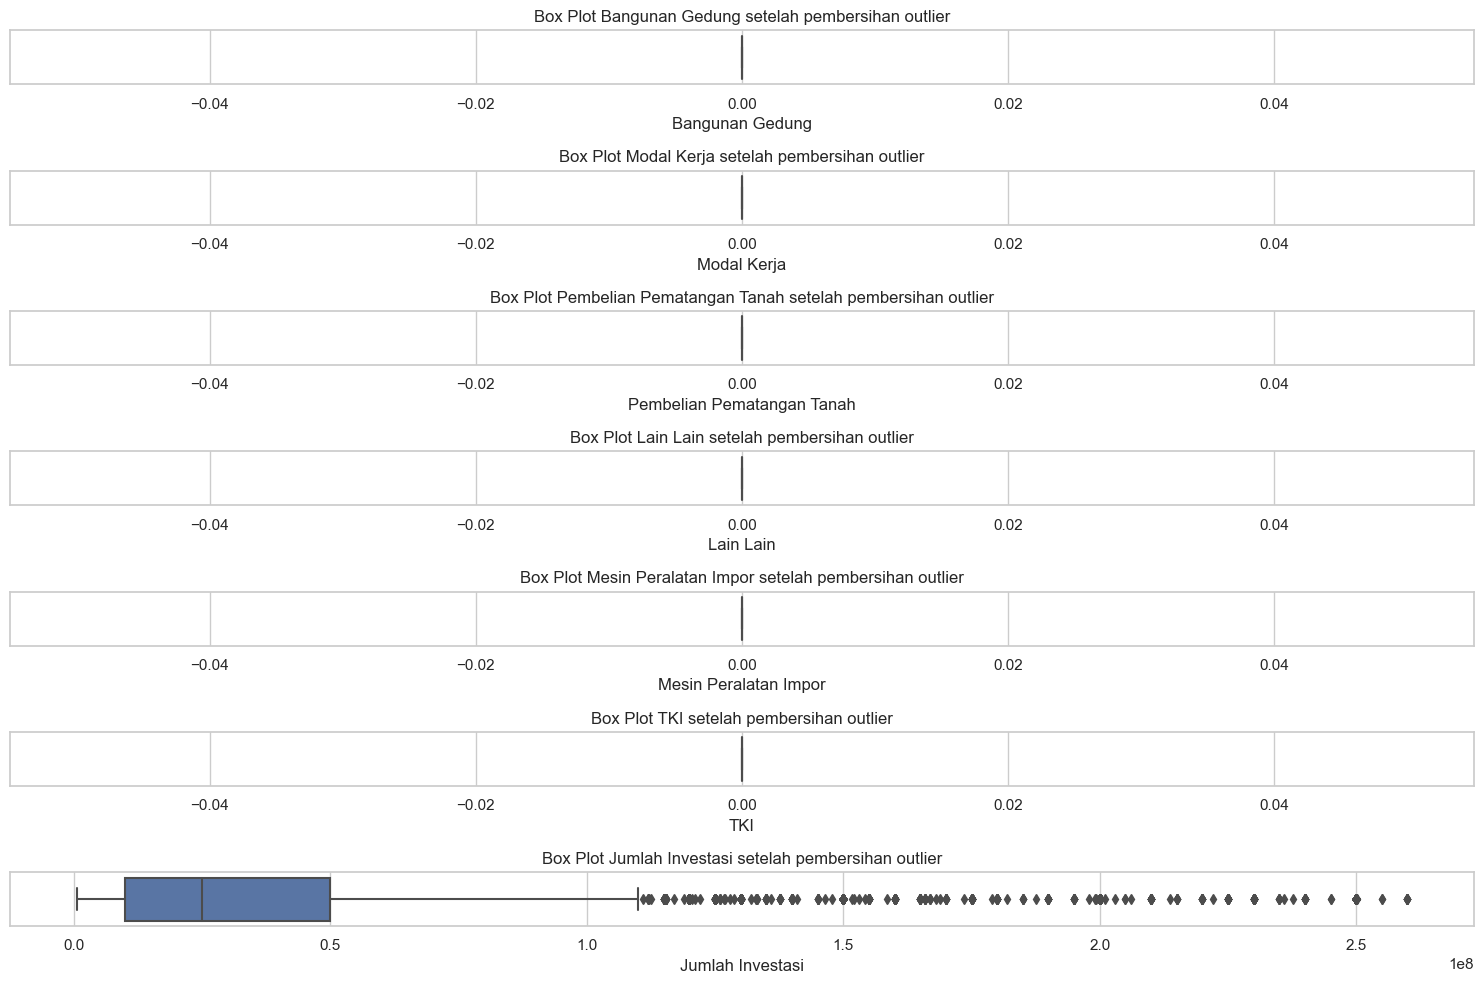

<Figure size 1200x1000 with 0 Axes>

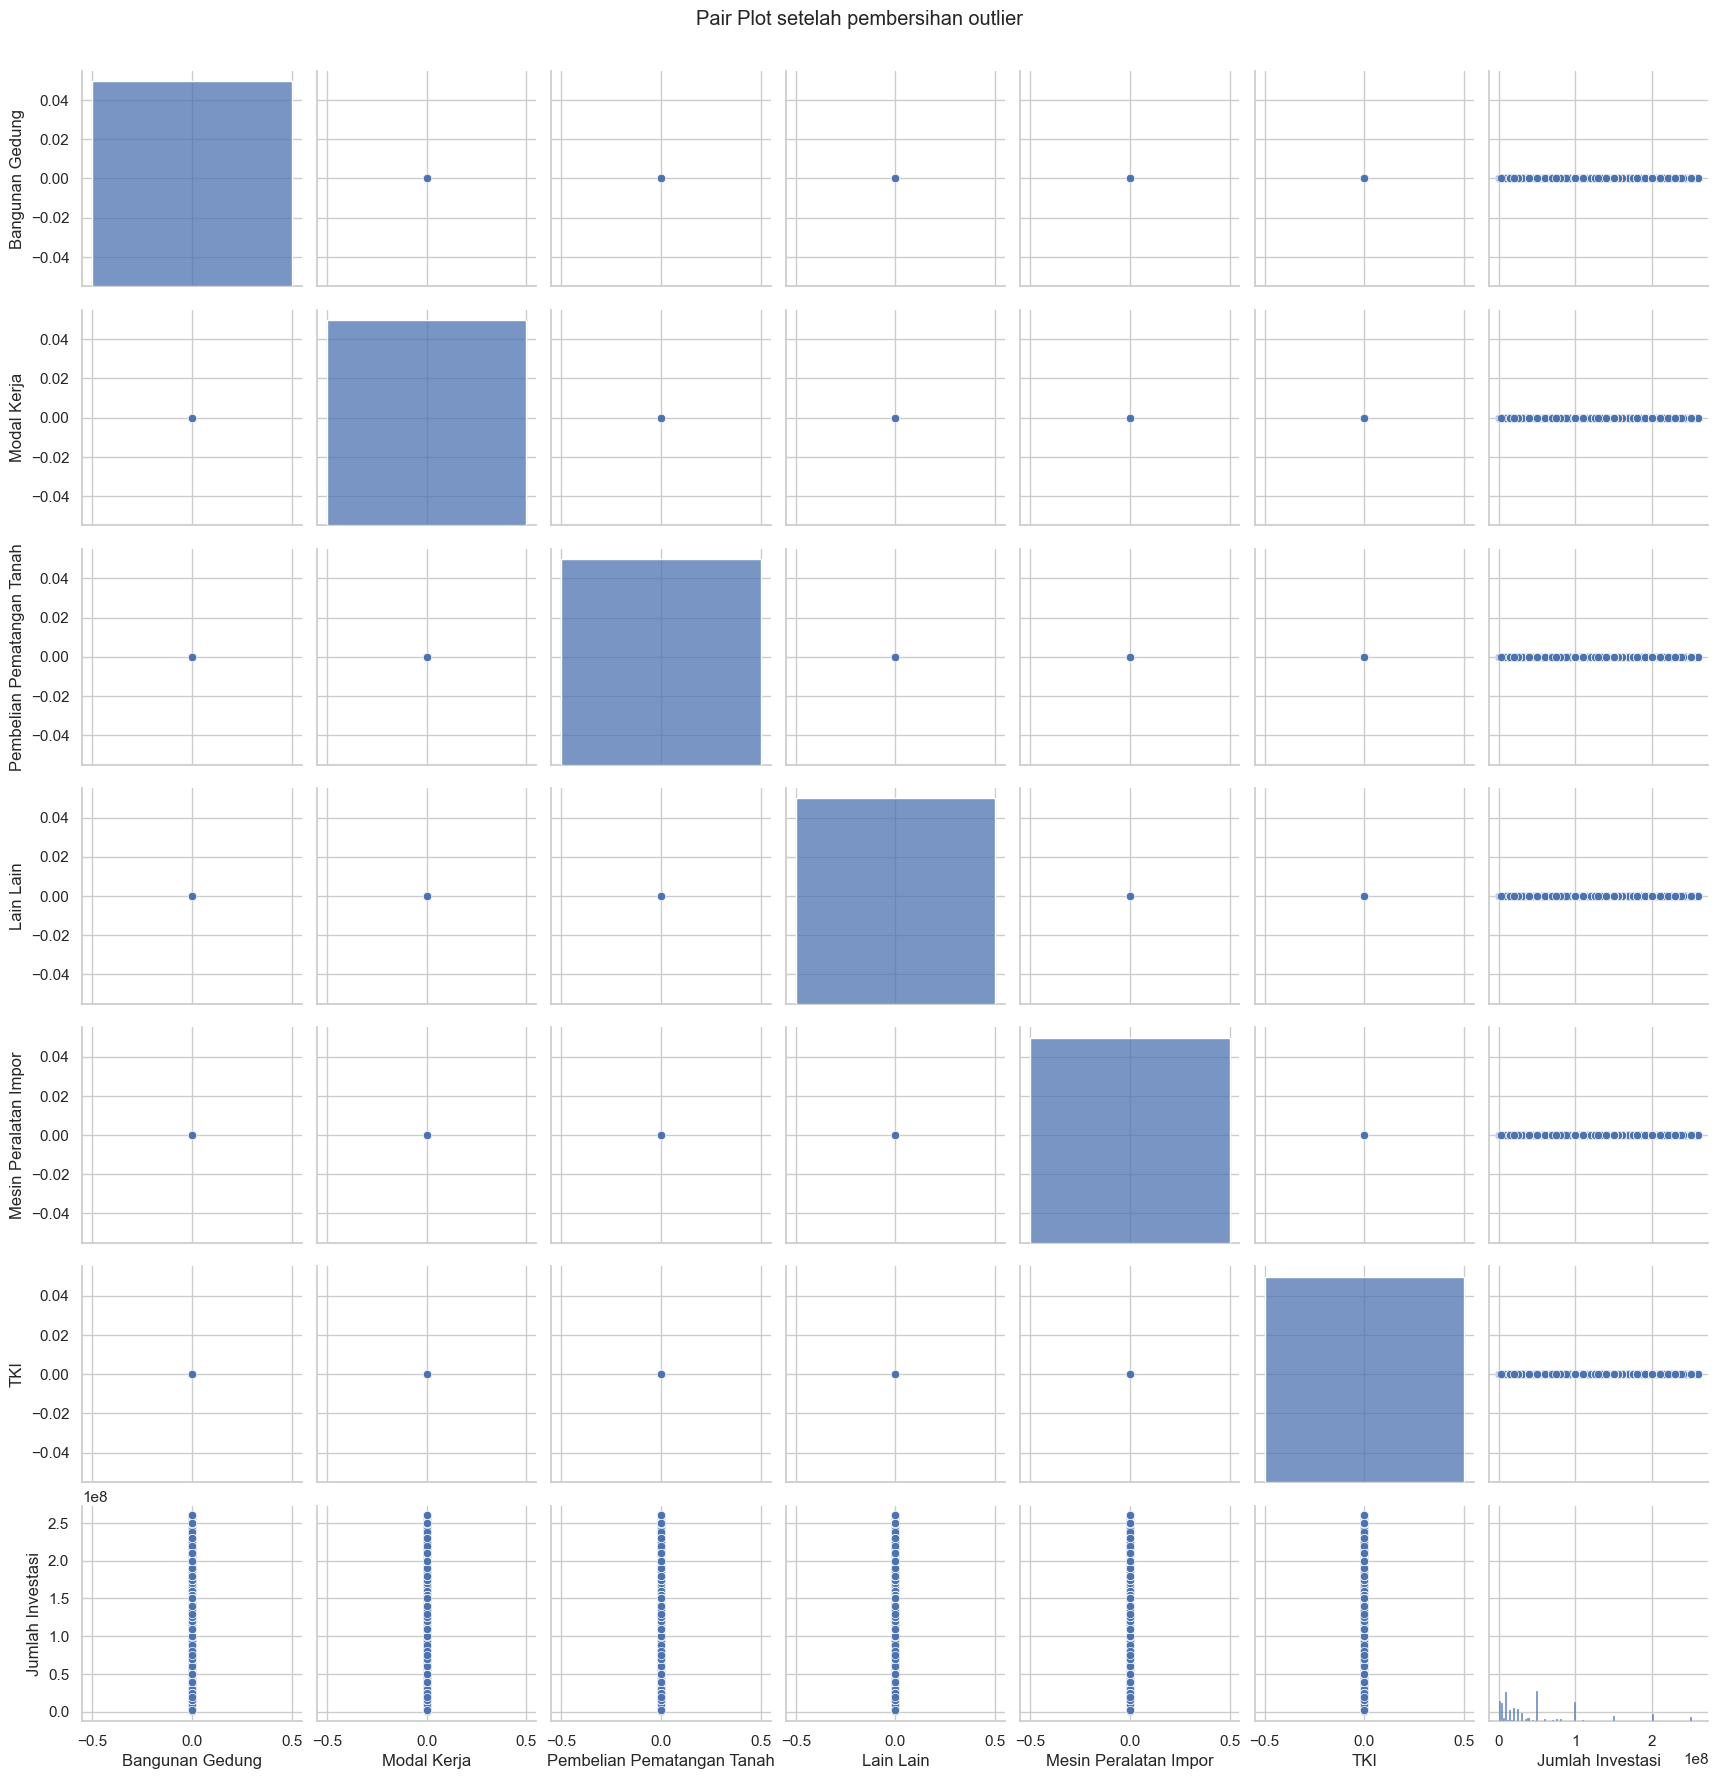

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur style seaborn
sns.set(style="whitegrid")

# Fitur yang akan divisualisasikan
features_to_plot = feature_columns + [target_column]

# Plot Histogram untuk setiap fitur
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(len(features_to_plot), 1, i + 1)
    sns.histplot(data_clean[feature], bins=30, kde=True)
    plt.title(f'Distribusi {feature} setelah pembersihan outlier')
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

# Plot Box Plot untuk setiap fitur
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(len(features_to_plot), 1, i + 1)
    sns.boxplot(x=data_clean[feature])
    plt.title(f'Box Plot {feature} setelah pembersihan outlier')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

# Plot Pair Plot untuk melihat hubungan antar fitur
plt.figure(figsize=(12, 10))
sns.pairplot(data_clean[features_to_plot])
plt.suptitle('Pair Plot setelah pembersihan outlier', y=1.02)
plt.show()


Jumlah data sebelum pembersihan: 27556
Jumlah data setelah pembersihan: 24768


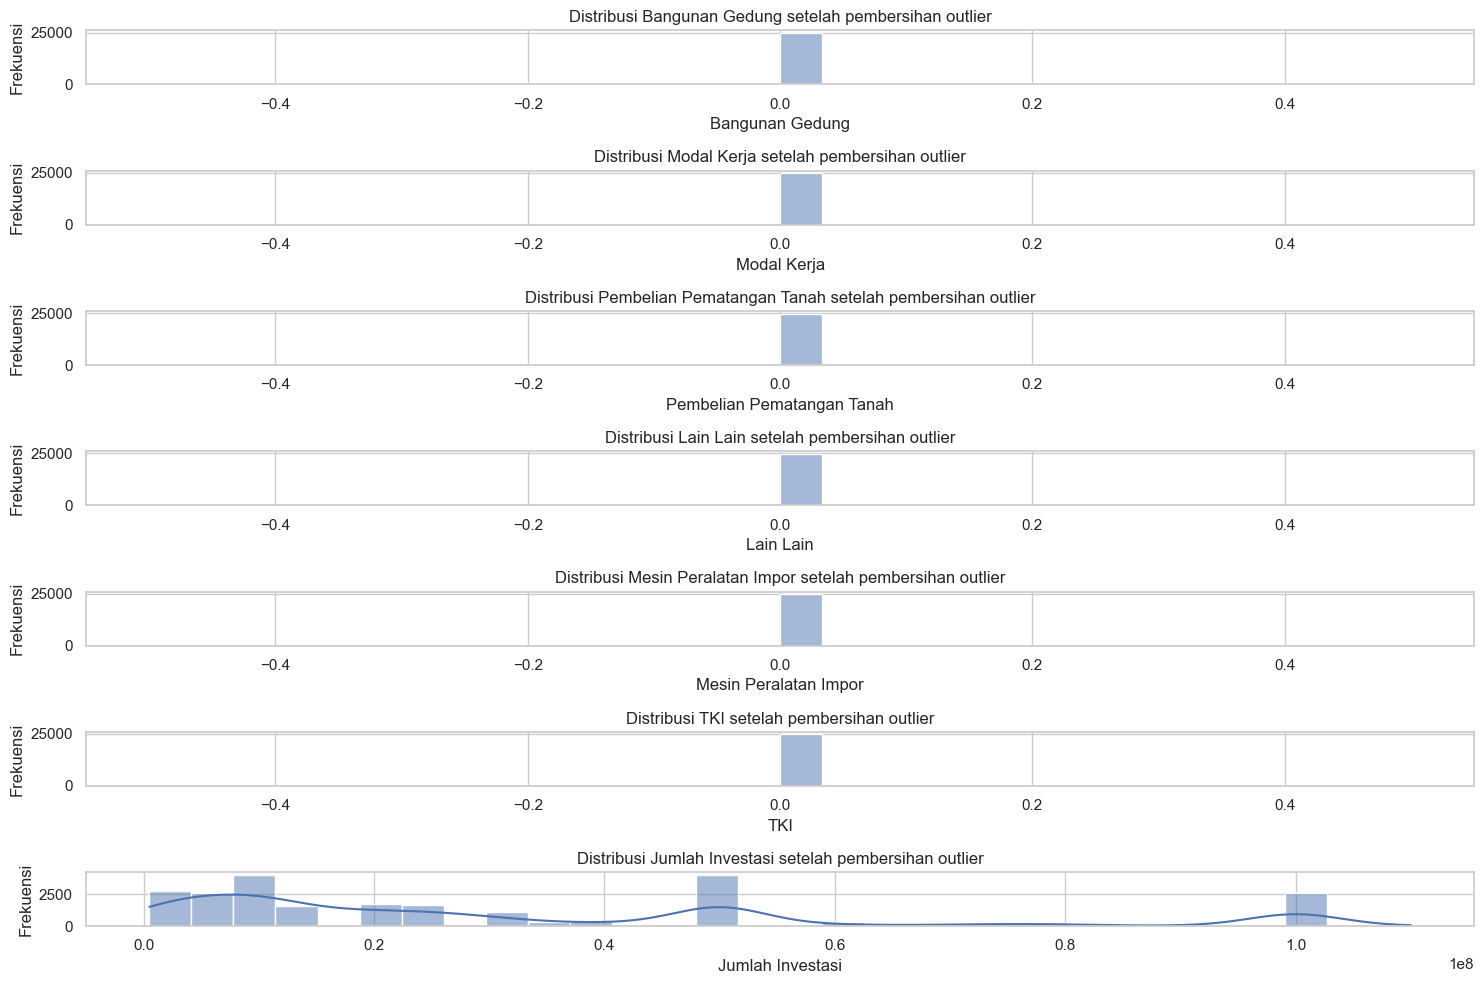

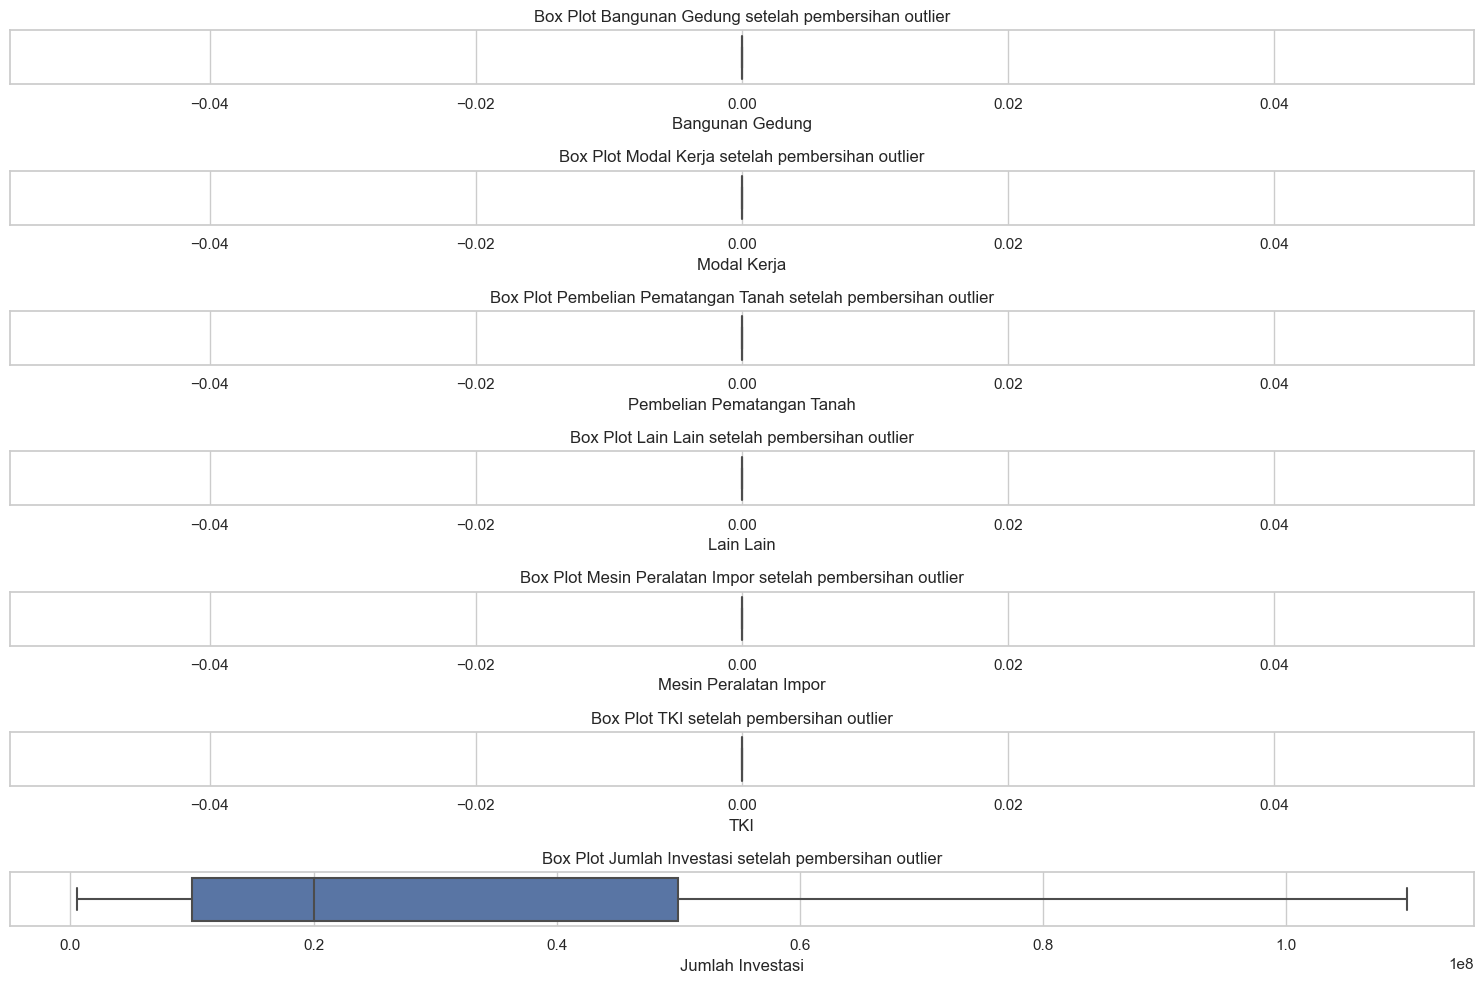

In [ ]:
import pandas as pd

# Fungsi untuk mendeteksi dan menghapus outlier berdasarkan IQR
def detect_and_remove_outliers_iqr(df, column_names):
    # Menginisialisasi Series boolean dengan panjang yang sama dengan DataFrame
    rows_to_keep = pd.Series([True] * len(df), index=df.index)
    
    for column in column_names:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        # Menentukan batas bawah dan batas atas
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Memperbarui baris yang tidak mengandung outlier
        rows_to_keep &= (df[column] >= lower_bound) & (df[column] <= upper_bound)
    
    # Mengembalikan data tanpa outlier
    return df[rows_to_keep]

# Kolom fitur dan target
feature_columns = ['Bangunan Gedung', 'Modal Kerja', 'Pembelian Pematangan Tanah', 'Lain Lain', 'Mesin Peralatan Impor', 'TKI']
target_column = 'Jumlah Investasi'

# Menghapus outlier dari kolom fitur dan target
data_clean_final = detect_and_remove_outliers_iqr(data_clean.copy(), feature_columns + [target_column])

# Memeriksa data setelah pembersihan outlier
print(f"Jumlah data sebelum pembersihan: {len(data_clean)}")
print(f"Jumlah data setelah pembersihan: {len(data_clean_final)}")

# Opsional: Visualisasi data bersih akhir
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur style seaborn
sns.set(style="whitegrid")

# Plot Histogram untuk setiap fitur
plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature_columns + [target_column]):
    plt.subplot(len(feature_columns + [target_column]), 1, i + 1)
    sns.histplot(data_clean_final[feature], bins=30, kde=True)
    plt.title(f'Distribusi {feature} setelah pembersihan outlier')
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

# Plot Box Plot untuk setiap fitur
plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature_columns + [target_column]):
    plt.subplot(len(feature_columns + [target_column]), 1, i + 1)
    sns.boxplot(x=data_clean_final[feature])
    plt.title(f'Box Plot {feature} setelah pembersihan outlier')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

# Pisahkan fitur dan target
X = data_clean_final[feature_columns]
y = data_clean_final[target_column]

# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
xgb_model = xgb.XGBRegressor(random_state=42)

# Latih model Linear Regression
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

# Latih model Random Forest
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Latih model Gradient Boosting
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)

# Latih model XGBoost
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)

# Evaluasi model Linear Regression
print("Linear Regression")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, lr_y_pred):,.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, lr_y_pred):,.2f}")
print(f"R² Score: {r2_score(y_test, lr_y_pred):.2f}")
print("------------------------------")

# Evaluasi model Random Forest
print("Random Forest Regressor")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, rf_y_pred):,.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, rf_y_pred):,.2f}")
print(f"R² Score: {r2_score(y_test, rf_y_pred):.2f}")
print("------------------------------")

# Evaluasi model Gradient Boosting
print("Gradient Boosting Regressor")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, gb_y_pred):,.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, gb_y_pred):,.2f}")
print(f"R² Score: {r2_score(y_test, gb_y_pred):.2f}")
print("------------------------------")

# Evaluasi model XGBoost
print("XGBoost Regressor")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, xgb_y_pred):,.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, xgb_y_pred):,.2f}")
print(f"R² Score: {r2_score(y_test, xgb_y_pred):.2f}")
print("------------------------------")


Linear Regression
Mean Absolute Error (MAE): 25,744,686.54
Mean Squared Error (MSE): 977,105,018,247,175.88
R² Score: -0.00
------------------------------
Random Forest Regressor
Mean Absolute Error (MAE): 25,747,239.98
Mean Squared Error (MSE): 977,101,687,483,609.62
R² Score: -0.00
------------------------------
Gradient Boosting Regressor
Mean Absolute Error (MAE): 25,744,686.54
Mean Squared Error (MSE): 977,105,018,247,175.88
R² Score: -0.00
------------------------------
XGBoost Regressor
Mean Absolute Error (MAE): 25,744,685.59
Mean Squared Error (MSE): 977,105,019,524,926.38
R² Score: -0.00
------------------------------


In [ ]:
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_

# Melakukan prediksi pada data testing
y_pred = best_rf_model.predict(X_test)

# Menghitung MAE, MSE, dan R² Score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Evaluasi Model Terbaik (Random Forest Regressor):")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"R² Score: {r2:.2f}")


Evaluasi Model Terbaik (Random Forest Regressor):
Mean Absolute Error (MAE): 25,747,239.98
Mean Squared Error (MSE): 977,101,687,483,609.62
R² Score: -0.00


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE: {-scores.mean():,.2f}")


Cross-Validation MSE: 952,915,860,048,785.75


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Misalnya, data_clean_final adalah data yang sudah dibersihkan dari outlier
# Kolom fitur dan target
feature_columns = ['Bangunan Gedung', 'Modal Kerja', 'Pembelian Pematangan Tanah', 'Lain Lain', 'Mesin Peralatan Impor', 'TKI']
target_column = 'Jumlah Investasi'

# Memisahkan data menjadi fitur dan target
X = data_clean_final[feature_columns]
y = data_clean_final[target_column]

# Membagi data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Mendefinisikan dan men-tune model RandomForest
rf_model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_rf_model = grid_search.best_estimator_

# Melakukan prediksi pada data testing
y_pred = best_rf_model.predict(X_test_scaled)

# Menghitung MAE, MSE, dan R² Score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Evaluasi Model Terbaik (Random Forest Regressor):")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"R² Score: {r2:.2f}")


Evaluasi Model Terbaik (Random Forest Regressor):
Mean Absolute Error (MAE): 25,747,239.98
Mean Squared Error (MSE): 977,101,687,483,609.62
R² Score: -0.00


c:\Users\Widnyana\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Widnyana\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\Widnyana\anaconda3\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\Widnyana\anaconda3\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Widnyana\anaconda3\lib\subprocess.py", line 1420, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
c:\Users\Widnyana\anaconda3\lib

   Tanggal Terbit Oss  Kab Kota Usaha  kecamatan_usaha  kelurahan_usaha  \
2          2018-08-13               0                2               20   
10         2018-08-20               0                2               38   
12         2018-08-28               0                2               20   
15         2018-06-09               0                3               57   
19         2018-09-18               0                4               35   

    Judul Kbli  KL/Sektor Pembina  luas_tanah  Mesin Peralatan  \
2          208                 18        5.55              0.0   
10         975                 13      191.00       70000000.0   
12         908                 16       10.00        1000000.0   
15         975                 13      350.00              0.0   
19         777                 16       60.00        7000000.0   

    Mesin Peralatan Impor  Pembelian Pematangan Tanah  ...  \
2                     0.0                         0.0  ...   
10                    0.0   

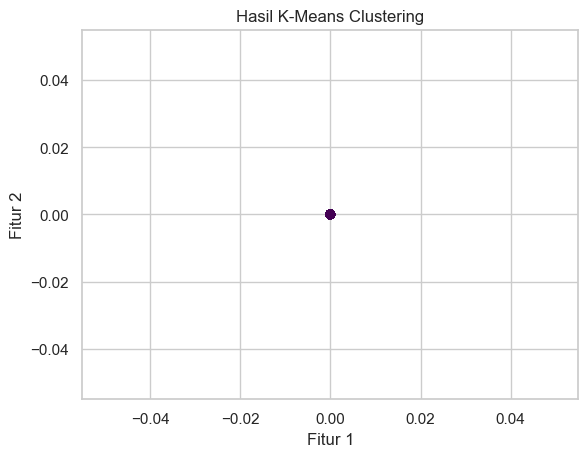

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Pilih fitur yang akan digunakan untuk clustering
features = ['Bangunan Gedung', 'Modal Kerja', 'Pembelian Pematangan Tanah', 'Lain Lain', 'Mesin Peralatan Impor', 'TKI']
X = data_clean[features]

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menentukan jumlah cluster
kmeans = KMeans(n_clusters=3, random_state=42)  # Misalnya, kita coba 3 cluster
kmeans.fit(X_scaled)

# Menambahkan hasil cluster ke data
data_clean['Cluster'] = kmeans.labels_

# Menampilkan hasil clustering
print(data_clean.head())

# Visualisasi hasil clustering (jika fitur hanya 2D atau 3D)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.title('Hasil K-Means Clustering')
plt.show()


C:\Users\Widnyana\AppData\Local\Temp\ipykernel_33296\3399999164.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_stats = data_clean.groupby('Cluster').mean()


         Kab Kota Usaha  kecamatan_usaha  kelurahan_usaha  Judul Kbli  \
Cluster                                                                 
0                   0.0          2.32962        28.418675   597.34497   

         KL/Sektor Pembina  luas_tanah  Mesin Peralatan  \
Cluster                                                   
0                15.058753  102.629274     1.544487e+06   

         Mesin Peralatan Impor  Pembelian Pematangan Tanah  Bangunan Gedung  \
Cluster                                                                       
0                          0.0                         0.0              0.0   

         ...  Uraian Risiko Proyek_Tinggi  Uraian Skala Usaha_Usaha Kecil  \
Cluster  ...                                                                
0        ...                     0.024169                        0.083103   

         Uraian Skala Usaha_Usaha Menengah  Uraian Skala Usaha_Usaha Mikro  \
Cluster                                               

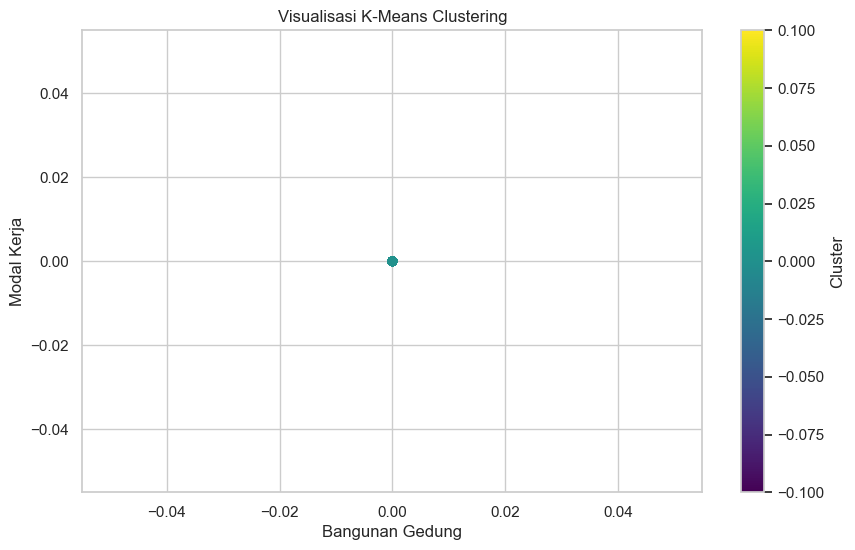

In [ ]:
# Analisis statistik deskriptif untuk setiap cluster
cluster_stats = data_clean.groupby('Cluster').mean()
print(cluster_stats)

# Visualisasi hasil clustering untuk dua fitur utama
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data_clean['Bangunan Gedung'], data_clean['Modal Kerja'], c=data_clean['Cluster'], cmap='viridis')
plt.xlabel('Bangunan Gedung')
plt.ylabel('Modal Kerja')
plt.title('Visualisasi K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()


Mean Squared Error: 5.906072884144971e+25
Prediksi Jumlah Investasi Tahun 2024: 12834297416369.0


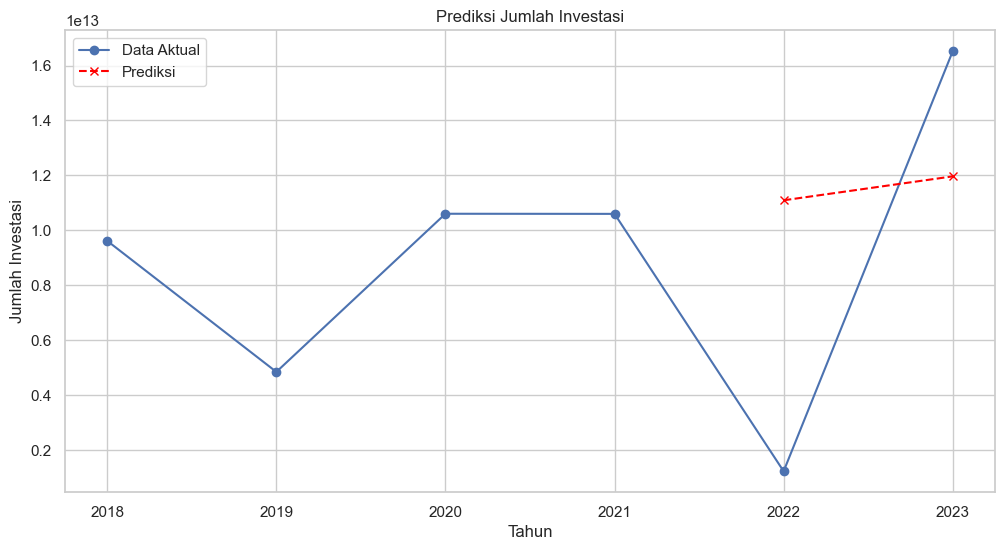

In [ ]:
# Mengonversi kolom tanggal menjadi tipe datetime
data['Tanggal Terbit Oss'] = pd.to_datetime(data['Tanggal Terbit Oss'])
data.set_index('Tanggal Terbit Oss', inplace=True)

# Mengelompokkan data berdasarkan tahun dan menghitung total investasi
data_yearly = data.resample('Y').sum()

# Menambahkan fitur tahun sebagai variabel independen
data_yearly['Year'] = data_yearly.index.year

# Fitur dan target
X = data_yearly[['Year']]
y = data_yearly['Jumlah Investasi']

# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Melatih model regresi linier
model = LinearRegression()
model.fit(X_train, y_train)

# Memprediksi jumlah investasi
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Prediksi tahun berikutnya
next_year = pd.DataFrame({'Year': [data_yearly.index.year.max() + 1]})
next_year_pred = model.predict(next_year)
print(f'Prediksi Jumlah Investasi Tahun {next_year.iloc[0, 0]}: {next_year_pred[0]}')

# Visualisasi hasil
plt.figure(figsize=(12, 6))
plt.plot(data_yearly.index.year, y, marker='o', label='Data Aktual')
plt.plot(X_test, y_pred, color='red', linestyle='--', marker='x', label='Prediksi')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Investasi')
plt.title('Prediksi Jumlah Investasi')
plt.legend()
plt.show()

C:\Users\Widnyana\AppData\Local\Temp\ipykernel_33296\971803019.py:12: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  new['Tanggal Terbit Oss'] = pd.to_datetime(new['Tanggal Terbit Oss'])
C:\Users\Widnyana\AppData\Local\Temp\ipykernel_33296\971803019.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_yearly = new.resample('Y').sum()


Mean Squared Error: 5.467264051535228e+27
Prediksi Jumlah Investasi Tahun 2024: 16664986910720.0


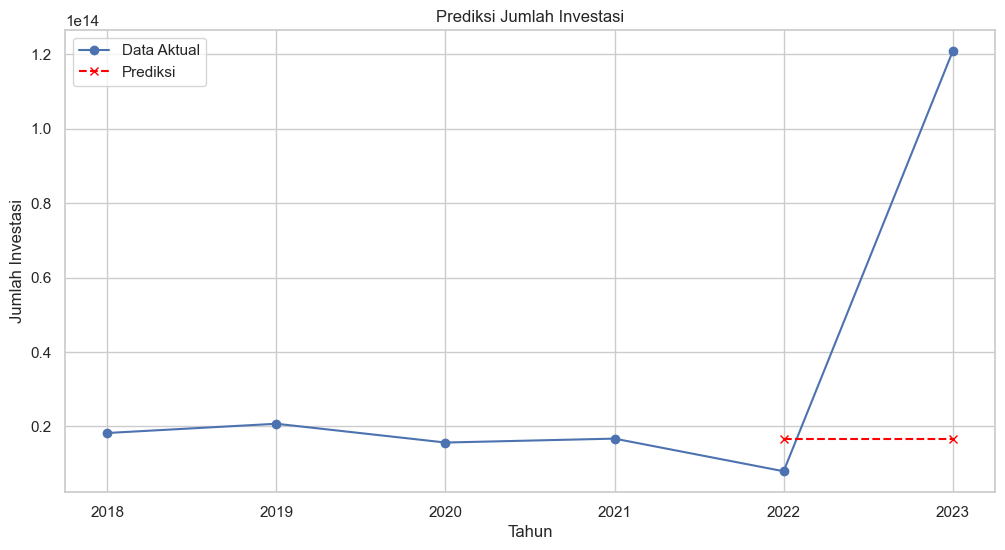

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Memuat data dari file Excel
new = pd.read_excel('DP.Proyek.xlsx')

# Mengonversi kolom tanggal menjadi tipe datetime
new['Tanggal Terbit Oss'] = pd.to_datetime(new['Tanggal Terbit Oss'])
new.set_index('Tanggal Terbit Oss', inplace=True)

# Mengelompokkan data berdasarkan tahun dan menghitung total investasi
new_yearly = new.resample('Y').sum()

# Menambahkan fitur tahun sebagai variabel independen
new_yearly['Year'] = new_yearly.index.year

# Fitur dan target
X = new_yearly[['Year']]
y = new_yearly['Jumlah Investasi']

# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Hyperparameter tuning untuk XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 1.0]
}

xgb_model = XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_xgb_model = grid_search.best_estimator_

# Memprediksi jumlah investasi
y_pred = best_xgb_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Prediksi tahun berikutnya
next_year = pd.DataFrame({'Year': [new_yearly.index.year.max() + 1]})
next_year_pred = best_xgb_model.predict(next_year)
print(f'Prediksi Jumlah Investasi Tahun {next_year.iloc[0, 0]}: {next_year_pred[0]}')

# Visualisasi hasil
plt.figure(figsize=(12, 6))
plt.plot(new_yearly.index.year, y, marker='o', label='Data Aktual')
plt.plot(X_test, y_pred, color='red', linestyle='--', marker='x', label='Prediksi')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Investasi')
plt.title('Prediksi Jumlah Investasi')
plt.legend()
plt.show()


C:\Users\Widnyana\AppData\Local\Temp\ipykernel_33296\2079619880.py:12: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  new['Tanggal Terbit Oss'] = pd.to_datetime(new['Tanggal Terbit Oss'])
C:\Users\Widnyana\AppData\Local\Temp\ipykernel_33296\2079619880.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_yearly = new.resample('Y').sum()


Mean Squared Error Ridge: 5.465256026610077e+27
Mean Squared Error Lasso: 5.687545266217451e+27
Prediksi Jumlah Investasi Tahun 2024 (Ridge): 16396300016387.25
Prediksi Jumlah Investasi Tahun 2024 (Lasso): 13519638289428.0


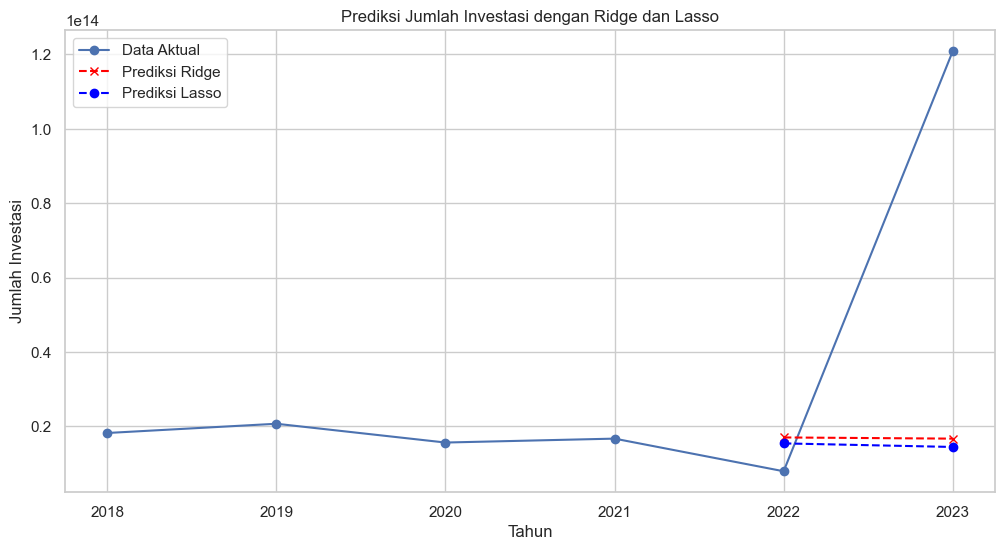

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Memuat data dari file Excel
new = pd.read_excel('DP.Proyek.xlsx')

# Mengonversi kolom tanggal menjadi tipe datetime
new['Tanggal Terbit Oss'] = pd.to_datetime(new['Tanggal Terbit Oss'])
new.set_index('Tanggal Terbit Oss', inplace=True)

# Mengelompokkan data berdasarkan tahun dan menghitung total investasi
new_yearly = new.resample('Y').sum()

# Menambahkan fitur tahun sebagai variabel independen
new_yearly['Year'] = new_yearly.index.year

# Fitur dan target
X = new_yearly[['Year']]
y = new_yearly['Jumlah Investasi']

# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Hyperparameter tuning untuk Regresi Ridge
ridge_param_grid = {
    'alpha': [0.1, 1, 10, 100]
}

ridge_model = Ridge()
ridge_grid_search = GridSearchCV(estimator=ridge_model, param_grid=ridge_param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_grid_search.fit(X_train, y_train)
best_ridge_model = ridge_grid_search.best_estimator_

# Hyperparameter tuning untuk Regresi Lasso
lasso_param_grid = {
    'alpha': [0.1, 1, 10, 100]
}

lasso_model = Lasso()
lasso_grid_search = GridSearchCV(estimator=lasso_model, param_grid=lasso_param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_grid_search.fit(X_train, y_train)
best_lasso_model = lasso_grid_search.best_estimator_

# Memprediksi jumlah investasi dengan model Ridge dan Lasso
y_pred_ridge = best_ridge_model.predict(X_test)
y_pred_lasso = best_lasso_model.predict(X_test)

# Evaluasi model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error Ridge: {mse_ridge}')
print(f'Mean Squared Error Lasso: {mse_lasso}')

# Prediksi tahun berikutnya
next_year = pd.DataFrame({'Year': [new_yearly.index.year.max() + 1]})
next_year_pred_ridge = best_ridge_model.predict(next_year)
next_year_pred_lasso = best_lasso_model.predict(next_year)
print(f'Prediksi Jumlah Investasi Tahun {next_year.iloc[0, 0]} (Ridge): {next_year_pred_ridge[0]}')
print(f'Prediksi Jumlah Investasi Tahun {next_year.iloc[0, 0]} (Lasso): {next_year_pred_lasso[0]}')

# Visualisasi hasil
plt.figure(figsize=(12, 6))
plt.plot(new_yearly.index.year, y, marker='o', label='Data Aktual')
plt.plot(X_test, y_pred_ridge, color='red', linestyle='--', marker='x', label='Prediksi Ridge')
plt.plot(X_test, y_pred_lasso, color='blue', linestyle='--', marker='o', label='Prediksi Lasso')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Investasi')
plt.title('Prediksi Jumlah Investasi dengan Ridge dan Lasso')
plt.legend()
plt.show()


C:\Users\Widnyana\AppData\Local\Temp\ipykernel_33296\3308620581.py:12: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  new['Tanggal Terbit Oss'] = pd.to_datetime(new['Tanggal Terbit Oss'])
C:\Users\Widnyana\AppData\Local\Temp\ipykernel_33296\3308620581.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_yearly = new.resample('Y').sum()


Mean Squared Error: 5.687545266245742e+27
Prediksi Jumlah Investasi Tahun 2024: 13519638289068.0


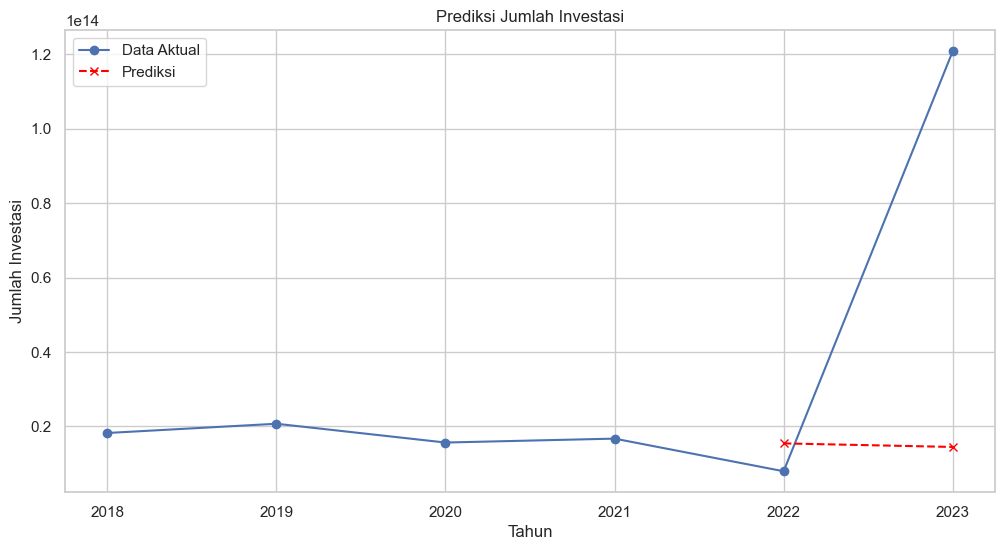

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Memuat data dari file Excel
new = pd.read_excel('DP.Proyek.xlsx')

# Mengonversi kolom tanggal menjadi tipe datetime
new['Tanggal Terbit Oss'] = pd.to_datetime(new['Tanggal Terbit Oss'])
new.set_index('Tanggal Terbit Oss', inplace=True)

# Mengelompokkan data berdasarkan tahun dan menghitung total investasi
new_yearly = new.resample('Y').sum()

# Menambahkan fitur tahun sebagai variabel independen
new_yearly['Year'] = new_yearly.index.year

# Fitur dan target
X = new_yearly[['Year']]
y = new_yearly['Jumlah Investasi']

# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Membangun model regresi linier
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Memprediksi jumlah investasi
y_pred = linear_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Prediksi tahun berikutnya
next_year = pd.DataFrame({'Year': [new_yearly.index.year.max() + 1]})
next_year_pred = linear_model.predict(next_year)
print(f'Prediksi Jumlah Investasi Tahun {next_year.iloc[0, 0]}: {next_year_pred[0]}')

# Visualisasi hasil
plt.figure(figsize=(12, 6))
plt.plot(new_yearly.index.year, y, marker='o', label='Data Aktual')
plt.plot(X_test, y_pred, color='red', linestyle='--', marker='x', label='Prediksi')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Investasi')
plt.title('Prediksi Jumlah Investasi')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Contoh data
data = pd.read_csv('data_investasi.csv')

# Mengonversi kolom tanggal menjadi tipe datetime
data['Tanggal'] = pd.to_datetime(data['Tanggal'])
data.set_index('Tanggal', inplace=True)

# Mengelompokkan data berdasarkan tahun dan menghitung total investasi
data_yearly = data.resample('Y').sum()

# Menambahkan fitur tahun sebagai variabel independen
data_yearly['Year'] = data_yearly.index.year

# Fitur dan target
X = data_yearly[['Year']]
y = data_yearly['Jumlah Investasi']

# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Hyperparameter tuning untuk XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 1.0]
}

xgb_model = XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_xgb_model = grid_search.best_estimator_

# Memprediksi jumlah investasi
y_pred = best_xgb_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Prediksi tahun berikutnya
next_year = pd.DataFrame({'Year': [data_yearly.index.year.max() + 1]})
next_year_pred = best_xgb_model.predict(next_year)
print(f'Prediksi Jumlah Investasi Tahun {next_year.iloc[0, 0]}: {next_year_pred[0]}')

# Visualisasi hasil
plt.figure(figsize=(12, 6))
plt.plot(data_yearly.index.year, y, marker='o', label='Data Aktual')
plt.plot(X_test, y_pred, color='red', linestyle='--', marker='x', label='Prediksi')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Investasi')
plt.title('Prediksi Jumlah Investasi')
plt.legend()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'data_investasi.csv'

c:\Users\Widnyana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Widnyana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Widnyana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Widnyana\anac

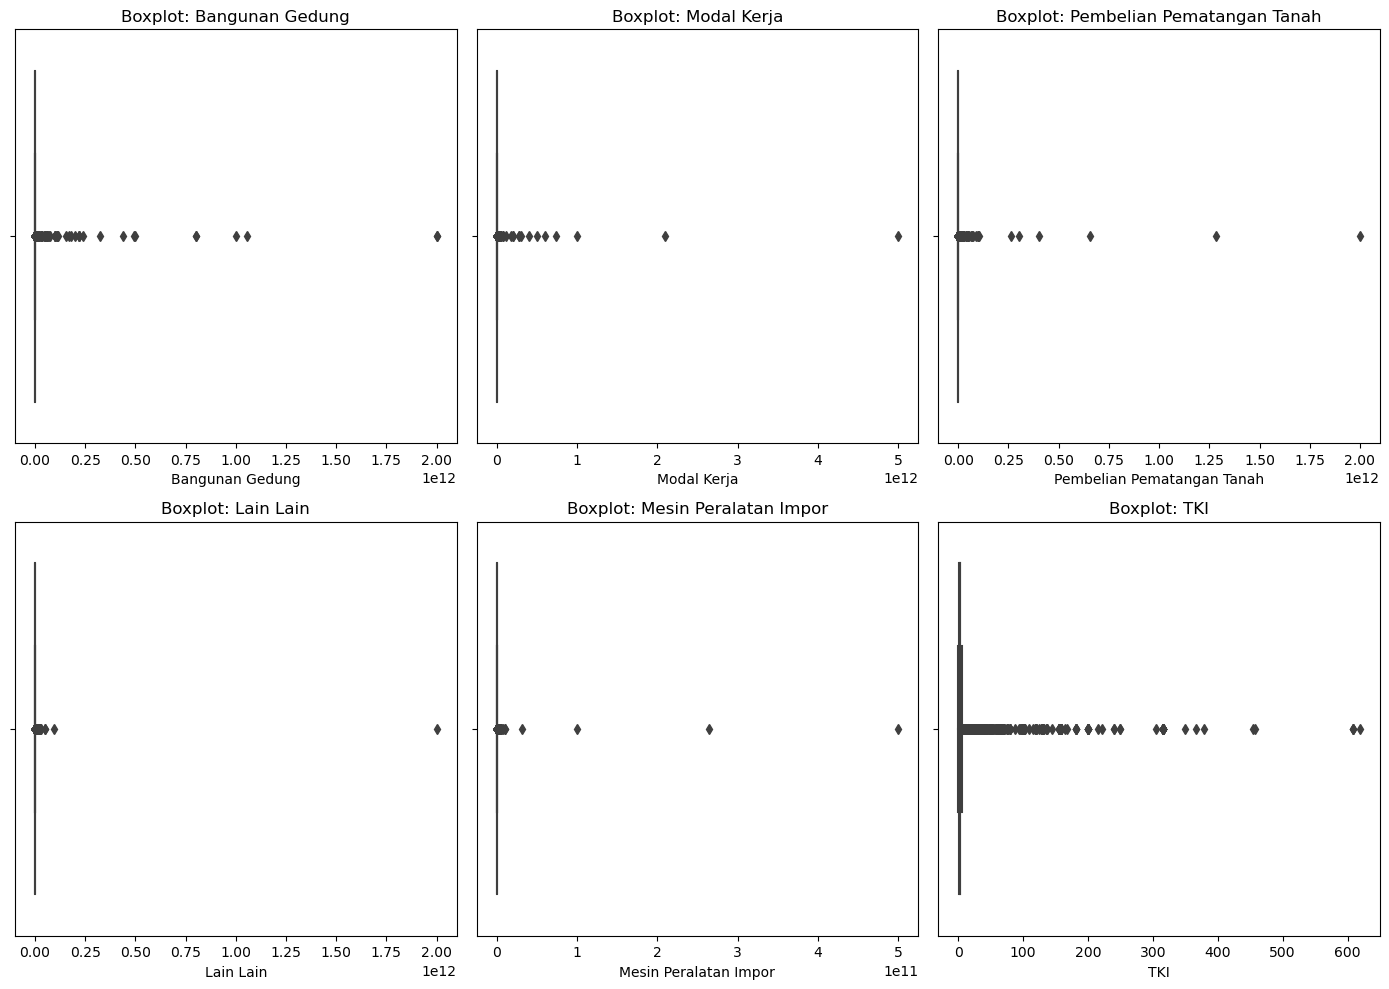

In [ ]:
# List fitur dengan korelasi tinggi
features_high_corr = [
    'Bangunan Gedung', 'Modal Kerja', 'Pembelian Pematangan Tanah', 
    'Lain Lain', 'Mesin Peralatan Impor', 'TKI'
]

# Visualisasi boxplot untuk fitur-fitur dengan korelasi tinggi
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features_high_corr, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data[feature])
    plt.title(f'Boxplot: {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

In [ ]:
# Memeriksa nilai kosong dan tipe data
print("Informasi DataFrame:")
print(data.info())

# Memeriksa statistik deskriptif
print("Statistik Deskriptif:")
print(data[features_high_corr].describe())

# Memeriksa nilai kosong
print("Jumlah nilai kosong:")
print(data[features_high_corr].isnull().sum())


Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32940 entries, 1 to 47361
Data columns (total 45 columns):
 #   Column                                                                            Non-Null Count  Dtype         
---  ------                                                                            --------------  -----         
 0   Tanggal Terbit Oss                                                                32940 non-null  datetime64[ns]
 1   Kab Kota Usaha                                                                    32940 non-null  int32         
 2   kecamatan_usaha                                                                   32940 non-null  int32         
 3   kelurahan_usaha                                                                   32940 non-null  int32         
 4   Judul Kbli                                                                        32940 non-null  int32         
 5   KL/Sektor Pembina                      

In [ ]:
# Memeriksa apakah outlier telah dihapus dengan benar
print("Data setelah penghapusan outlier:")
print(data.shape)

# Menampilkan beberapa baris data untuk memastikan
print(data.head())

# Memeriksa apakah kolom yang dihapus ada atau tidak
print("Kolom outlier yang seharusnya dihapus:")
for feature in features_high_corr:
    if f'{feature}_outlier' in data.columns:
        print(f"{feature}_outlier present")
    else:
        print(f"{feature}_outlier not found")


Data setelah penghapusan outlier:
(32940, 45)
   Tanggal Terbit Oss  Kab Kota Usaha  kecamatan_usaha  kelurahan_usaha  \
1          2018-08-08               0                3               57   
2          2018-08-13               0                2               20   
10         2018-08-20               0                2               38   
11         2018-08-23               0                3               26   
12         2018-08-28               0                2               20   

    Judul Kbli  KL/Sektor Pembina  luas_tanah  Mesin Peralatan  \
1          633                 13      500.00              0.0   
2          208                 18        5.55              0.0   
10         975                 13      191.00       70000000.0   
11         946                 13      766.00       29060458.0   
12         908                 16       10.00        1000000.0   

    Mesin Peralatan Impor  Pembelian Pematangan Tanah  ...  \
1                     0.0                0.0

Jumlah outlier berdasarkan IQR: 5384


c:\Users\Widnyana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


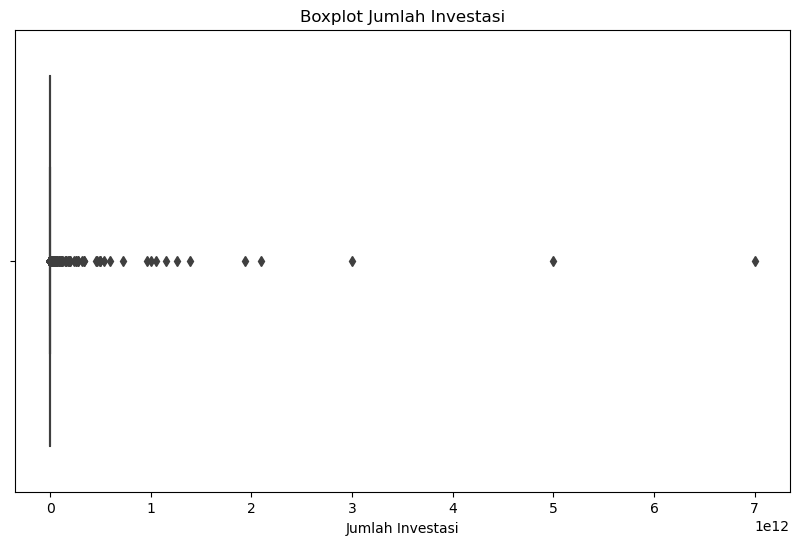

Nilai ekstrem pada Jumlah Investasi:
count    3.294000e+04
mean     1.621059e+09
std      5.578764e+10
min      5.000000e+05
25%      1.000000e+07
50%      4.062500e+07
75%      1.100000e+08
max      7.000000e+12
Name: Jumlah Investasi, dtype: float64
Beberapa nilai ekstrem:
    Jumlah Investasi
1          800000000
11        1000000000
13         500000000
14        2000000000
16        1537500000


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Memuat data (gunakan variabel 'data' jika sudah ada)
# data = pd.read_csv('path_to_your_data.csv')  # jika belum memuat data

# Menghitung IQR
Q1 = data['Jumlah Investasi'].quantile(0.25)
Q3 = data['Jumlah Investasi'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menentukan outlier
outliers_iqr = data[(data['Jumlah Investasi'] < lower_bound) | (data['Jumlah Investasi'] > upper_bound)]

print(f"Jumlah outlier berdasarkan IQR: {outliers_iqr.shape[0]}")

# Visualisasi boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data['Jumlah Investasi'])
plt.title('Boxplot Jumlah Investasi')
plt.xlabel('Jumlah Investasi')
plt.show()

# Menampilkan nilai ekstrem
print("Nilai ekstrem pada Jumlah Investasi:")
print(data['Jumlah Investasi'].describe())

# Menampilkan nilai di luar rentang yang diperluas
extreme_values = data[(data['Jumlah Investasi'] < lower_bound) | (data['Jumlah Investasi'] > upper_bound)]
print("Beberapa nilai ekstrem:")
print(extreme_values[['Jumlah Investasi']].head())


Jumlah data setelah menghapus outlier: 27556


c:\Users\Widnyana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


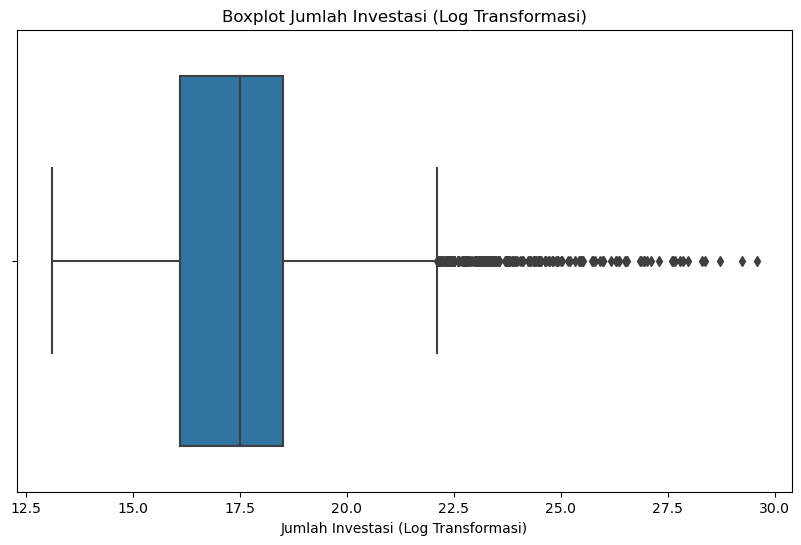

Beberapa nilai setelah penggantian outlier dengan median:
    Jumlah Investasi
1         40624998.0
2         50000000.0
10       200000000.0
11        40624998.0
12        30000000.0


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung IQR
Q1 = data['Jumlah Investasi'].quantile(0.25)
Q3 = data['Jumlah Investasi'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Metode 1: Menghapus Outlier
data_cleaned = data[~((data['Jumlah Investasi'] < lower_bound) | (data['Jumlah Investasi'] > upper_bound))]
print(f"Jumlah data setelah menghapus outlier: {data_cleaned.shape[0]}")

# Metode 2: Transformasi Data
data['Jumlah Investasi_log'] = np.log1p(data['Jumlah Investasi'])

# Menampilkan boxplot untuk kolom log-transformasi
plt.figure(figsize=(10, 6))
sns.boxplot(data['Jumlah Investasi_log'])
plt.title('Boxplot Jumlah Investasi (Log Transformasi)')
plt.xlabel('Jumlah Investasi (Log Transformasi)')
plt.show()

# Metode 3: Penggantian Nilai Outlier
median_value = data['Jumlah Investasi'].median()
data['Jumlah Investasi'] = np.where((data['Jumlah Investasi'] < lower_bound) | (data['Jumlah Investasi'] > upper_bound), median_value, data['Jumlah Investasi'])

print("Beberapa nilai setelah penggantian outlier dengan median:")
print(data[['Jumlah Investasi']].head())


In [ ]:
from sklearn.model_selection import train_test_split

# Memilih fitur dengan korelasi tinggi dan target
features = ['Bangunan Gedung', 'Modal Kerja', 'Pembelian Pematangan Tanah', 'Lain Lain', 'Mesin Peralatan Impor', 'TKI']
X = data[features]
y = data['Jumlah Investasi']

# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Membuat model
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Melatih model dan menyimpan hasil
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Menghitung metrik evaluasi
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'R² Score': r2
    }

# Menampilkan hasil evaluasi
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Mean Absolute Error (MAE): {metrics['Mean Absolute Error']:.2f}")
    print(f"Mean Squared Error (MSE): {metrics['Mean Squared Error']:.2f}")
    print(f"R² Score: {metrics['R² Score']:.2f}")
    print("------------------------------")


Model: Linear Regression
Mean Absolute Error (MAE): 35713910.93
Mean Squared Error (MSE): 2700267614708426.00
R² Score: 0.00
------------------------------
Model: Random Forest Regressor
Mean Absolute Error (MAE): 22865198.29
Mean Squared Error (MSE): 1492160563358843.75
R² Score: 0.45
------------------------------


In [ ]:
from sklearn.model_selection import train_test_split

# Memilih fitur dan target setelah pembersihan outlier
X_clean = data_clean[feature_columns]
y_clean = data_clean[target_column]

# Membagi data menjadi set pelatihan dan set pengujian
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)
